# <b>Lending Club Case Study </b>

### <b>Business Objectives</b>

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower-interest-rate loans through a fast online interface. 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (credit loss). Credit loss is the amount of money the lender loses when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
If one can identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables that are strong indicators of default.  
The company can utilise this knowledge for its portfolio and risk assessment.

***************************

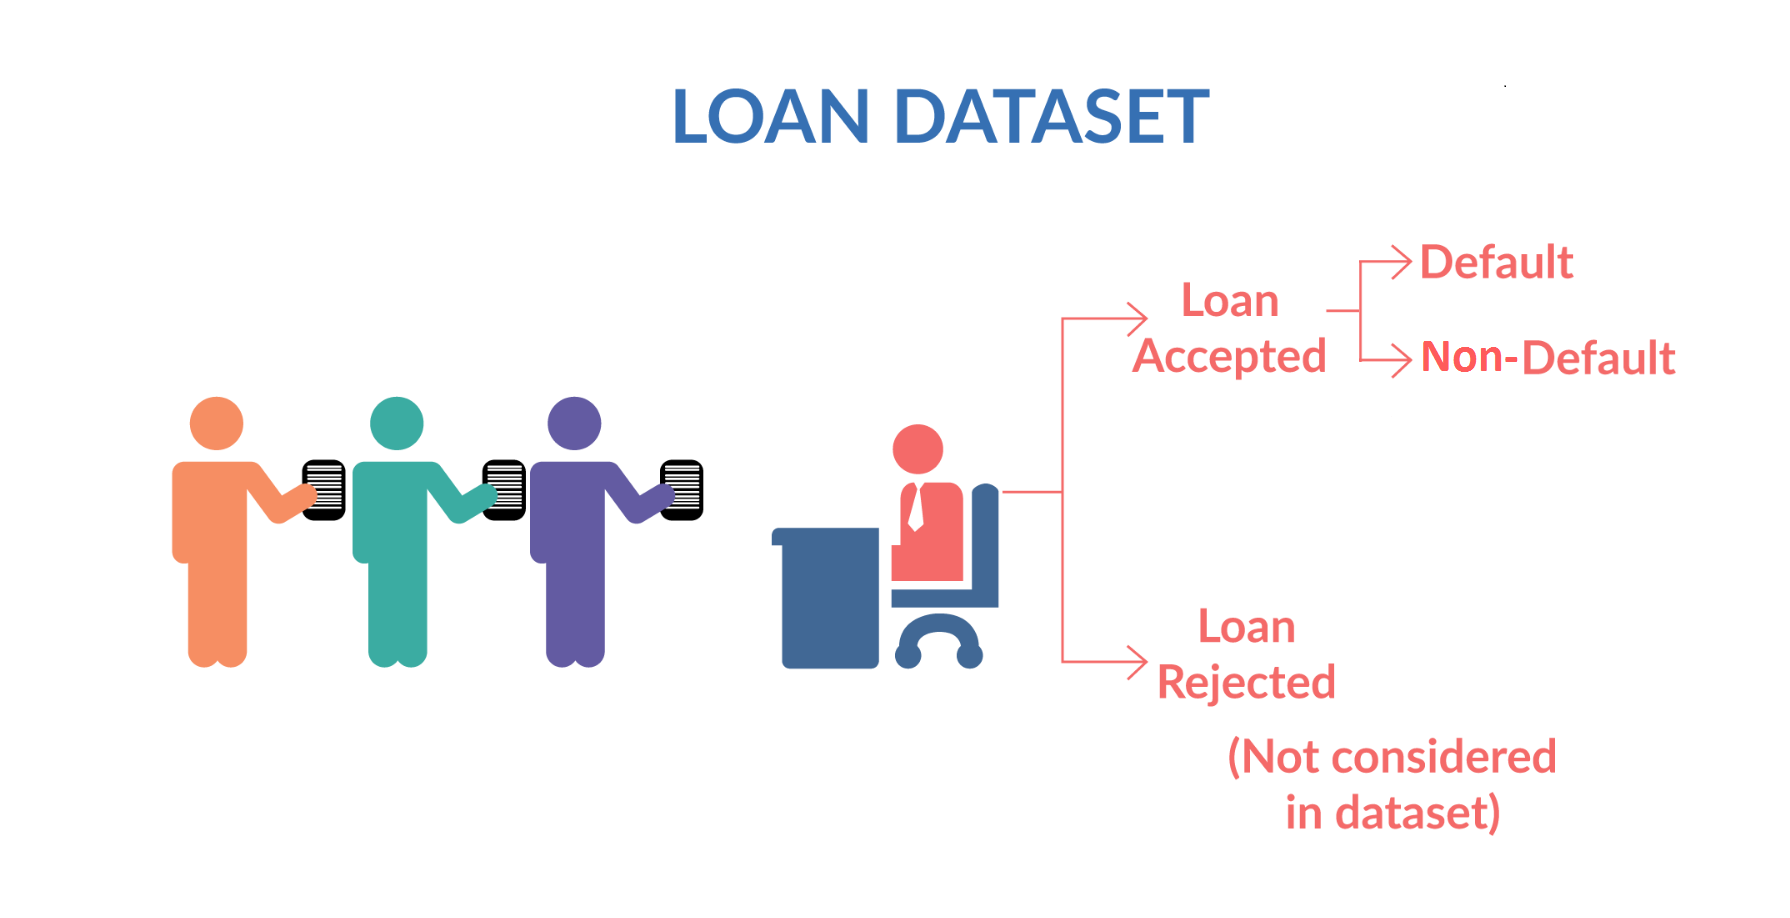

When a person applies for a loan, there are two types of decisions that the company could take:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - Charged-off: Applicant has not paid the instalments in due time for a long period, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## <b> 1. Imports </b>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format 

import warnings
warnings.filterwarnings("ignore")

## <b> 2. Data Sourcing </b>

In [4]:
# Load the loan dataset
loan_data = pd.read_csv('https://github.com/phanirajcm/LendingClubCaseStudy/blob/aimliiitb/loan.csv?raw=true')

In [3]:
# Checking data head
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                 0.00   
1                NaN            NaN               NaN                 0.00   
2                NaN            NaN               NaN                 0.00   
3                NaN            NaN               NaN                 0.00   
4                NaN            NaN               NaN                 0.00   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0      0.00             NaN               NaN            NaN   
1      0.00             NaN               NaN            NaN   
2      0.00             NaN               NaN            NaN   
3      0.00             NaN               NaN            NaN   
4      0.00             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
# Checking for null values
loan_data.isnull().mean()

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
                             ... 
tax_liens                    0.00
tot_hi_cred_lim              1.00
total_bal_ex_mort            1.00
total_bc_limit               1.00
total_il_high_credit_limit   1.00
Length: 111, dtype: float64

## Data Cleaning and Understanding

In [5]:
# Removing the feature calumns which have 0 non-null values
loan_data.dropna(how="all", inplace=True, axis=1)

In [6]:
# Display information about the dataset (column names, non-null counts, data types)
print(loan_data.info())

# Check summary statistics for numerical columns
# loan amount requested by borrowers
loan_amount_stats = loan_data['loan_amnt'].describe()
print("*********************************************************************")

print("Loan Amount Statistics:")
print(loan_amount_stats)
print("*********************************************************************")

# Interesent rate charged on the loan
int_rate_stats = loan_data['int_rate'].describe()
print("Interest Rate Statistics:")
print(int_rate_stats)
print("*********************************************************************")

# Debt-to-Income Ratio
dti_stats = loan_data['dti'].describe()
print("Debt-to-Income Ratio Statistics:")
print(dti_stats)
print("*********************************************************************")

#Revolving Balance
revol_bal_stats = loan_data['revol_bal'].describe()
print("Revolving Balance Statistics:")
print(revol_bal_stats)
print("*********************************************************************")

# Calculate loan default rate
default_rate = loan_data['loan_status'].value_counts(normalize=True) * 100
print("Default Rate:\n", default_rate)
print("*********************************************************************")

# Check for any missing values in the dataset
print(loan_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [7]:
# Checking for unique value each feature holds
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

### Removing columns that are not required or not useful
- member_id
- desc
- zip_code
- mths_since_last_delinq
- mths_since_last_record
- next_pymnt_d
- url
- emp_title
- tax_liens
- title
- pymnt_plan
- initial_list_status
- collections_12_mths_ex_med
- policy_code
- acc_now_delinq
- application_type
- delinq_amnt
- chargeoff_within_12_mths

In [8]:
unused_Columns = ["member_id", "desc","zip_code", "mths_since_last_delinq","mths_since_last_record","next_pymnt_d",
                 "url", "emp_title","tax_liens", "title", "pymnt_plan", "initial_list_status", "collections_12_mths_ex_med", 
                  "policy_code", "application_type", "application_type", "acc_now_delinq", "chargeoff_within_12_mths",
                  "delinq_amnt" 
                 ]

loan_data.drop(labels=unused_Columns, axis=1, inplace=True)

In [9]:
# We need to analyse features that can help to indetify the defauters
# Dropping the loan staus "Current"
loan_data = loan_data[loan_data["loan_status"].str.contains("Current") == False]

In [10]:
# Checking for unique value each feature holds
loan_data.nunique().sort_values()

out_prncp_inv                  1
out_prncp                      1
loan_status                    2
term                           2
pub_rec_bankruptcies           3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     370
earliest_cr_line             524
loan_amnt                    870
funded_amnt                 1019
revol_util                  1088
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries                  4040
annual_inc                  5215
total_rec_

In [11]:
# Remocing those feature columns that have only one unique value
unused_Columns = ["out_prncp_inv", "out_prncp"]
loan_data.drop(labels=unused_Columns, axis=1, inplace=True)

In [12]:
# Checking data frame shape
loan_data.shape

(38577, 37)

#### <b>Handling missing values</b> 

In [13]:
# feature "emp_length" has some missing values
print("Unique values present in 'emp_length':", loan_data.emp_length.value_counts())
print("*********************************************************************")
print("Null count before data cleaning", loan_data.emp_length.isnull().sum())

# Let fill null values in the "emp_length"
loan_data["emp_length"].fillna("Unknown", inplace=True)

print("Null values after data cleaning", loan_data.emp_length.isnull().sum())
print("*********************************************************************")
print("Unique values present in 'emp_length':", loan_data.emp_length.value_counts())

Unique values present in 'emp_length': emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64
*********************************************************************
Null count before data cleaning 1033
Null values after data cleaning 0
*********************************************************************
Unique values present in 'emp_length': emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Unknown      1033
Name: count, dtype: int64


In [14]:
# feature "pub_rec_bankruptcies" has some missing value
print("Unique values present in 'pub_rec_bankruptcies':", loan_data.pub_rec_bankruptcies.value_counts())
print("*********************************************************************")
print("Total null value in pub_rec_bankruptcies", loan_data.pub_rec_bankruptcies.isnull().sum())

# Let fill null values in the "pub_rec_bankruptcies"
loan_data["pub_rec_bankruptcies"].fillna("Unknown", inplace=True)

print("Null values after data cleaning", loan_data.pub_rec_bankruptcies.isnull().sum())
print("*********************************************************************")
print("Unique values present in 'emp_length':", loan_data.pub_rec_bankruptcies.value_counts())

Unique values present in 'pub_rec_bankruptcies': pub_rec_bankruptcies
0.00    36238
1.00     1637
2.00        5
Name: count, dtype: int64
*********************************************************************
Total null value in pub_rec_bankruptcies 697
Null values after data cleaning 0
*********************************************************************
Unique values present in 'emp_length': pub_rec_bankruptcies
0.00        36238
1.00         1637
 Unknown      697
2.00            5
Name: count, dtype: int64


In [15]:
# feature "revol_util" has some missing value
loan_data.revol_util.value_counts()

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [16]:
# Checking "revol_util" after removing null values, so we can handle missing values in original data
loan = loan_data[loan_data['revol_util'].notnull()]
loan['revol_util'] = loan['revol_util'].str.replace("%","")
loan['revol_util'] = pd.to_numeric(loan['revol_util'])

print(loan['revol_util'].describe())
print(loan['revol_util'].median())

count   38527.00
mean       48.70
std        28.36
min         0.00
25%        25.20
50%        49.10
75%        72.30
max        99.90
Name: revol_util, dtype: float64
49.1


In [17]:
# As above analysis the mean, and median are close to each other so let's fill na values with the mean value of column
loan_data['revol_util'].fillna("48.70%")

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38577, dtype: object

#### Let's standardise the feature columns data

In [18]:
# Interest Rate is a numerical value but categorised as an object because it includes "%" in it
# let's do data cleaning and remove the "%" from "int_rate"

loan_data['int_rate'] = loan_data['int_rate'].str.replace("%","")
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'])

# Revolving line utilization rate is a numerical value but categorised as an object because it includes "%" in it
# Let's do data cleaning and remove the "%" from "revol_util"
loan_data['revol_util'] = loan_data['revol_util'].str.replace("%","")
loan_data['revol_util'] = pd.to_numeric(loan_data['revol_util'])

In [19]:
loan_data.last_pymnt_d.isnull().sum()

71

In [20]:
loan_data.head(3)

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000          4975.00   36 months     10.65   
1  1077430       2500         2500          2500.00   60 months     15.27   
2  1077175       2400         2400          2400.00   36 months     15.96   

   installment grade sub_grade emp_length  ... total_pymnt_inv  \
0       162.87     B        B2  10+ years  ...         5833.84   
1        59.83     C        C4   < 1 year  ...         1008.71   
2        84.33     C        C5  10+ years  ...         3005.67   

   total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0          5000.00        863.16               0.00       0.00   
1           456.46        435.17               0.00     117.08   
2          2400.00        605.67               0.00       0.00   

  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  last_credit_pull_d  \
0                    0.00       Jan-15           171.62              May-16   
1                    1.11       Apr-13           119.66              Sep-13   
2                    0.00       Jun-14           649.91              May-16   

  pub_rec_bankruptcies  
0                 0.00  
1                 0.00  
2                 0.00  

[3 rows x 37 columns]

*************************

## <b> 3. Data Insights and Analysis </b>

### <b>Numerical Data Analysis : Univariate and Segmented Univariate</b>

count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


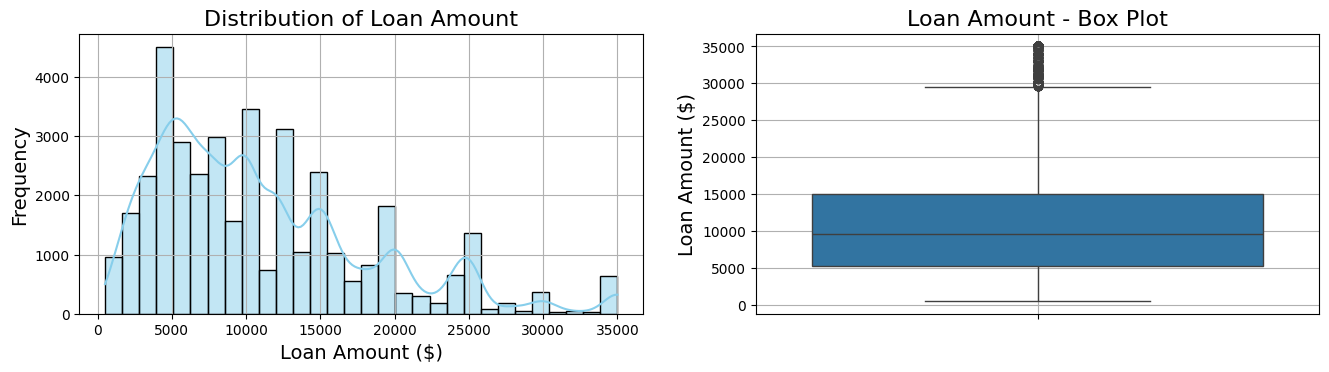

In [21]:
# Analysis of feature "loan_amnt"
print(loan_data['loan_amnt'].describe())

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)

#4 - Univariate Analysis - Histogram of a Numerical Variable (e.g., loan amount)
ax = sns.histplot(data=loan_data, x='loan_amnt', bins=30, kde=True, color='skyblue')
ax.set_title('Distribution of Loan Amount', fontsize=16)
ax.set_xlabel('Loan Amount ($)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.grid(True)

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16)
ax.set_ylabel('Loan Amount ($)',fontsize=14)
ax.grid(True)

plt.savefig("loan_amt.png", transparent=True)

plt.show()

#### <b>Observation:</b>
<b>"loan_amnt": Loan Amount feature analysis</b>
- Most of the loan amounts are between 5500 - 15000 thousand
- 99-95 percentile of loan amounts are under 30000 thousand

*************************  

count   38577.00
mean    10784.06
std      7090.31
min       500.00
25%      5200.00
50%      9550.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64


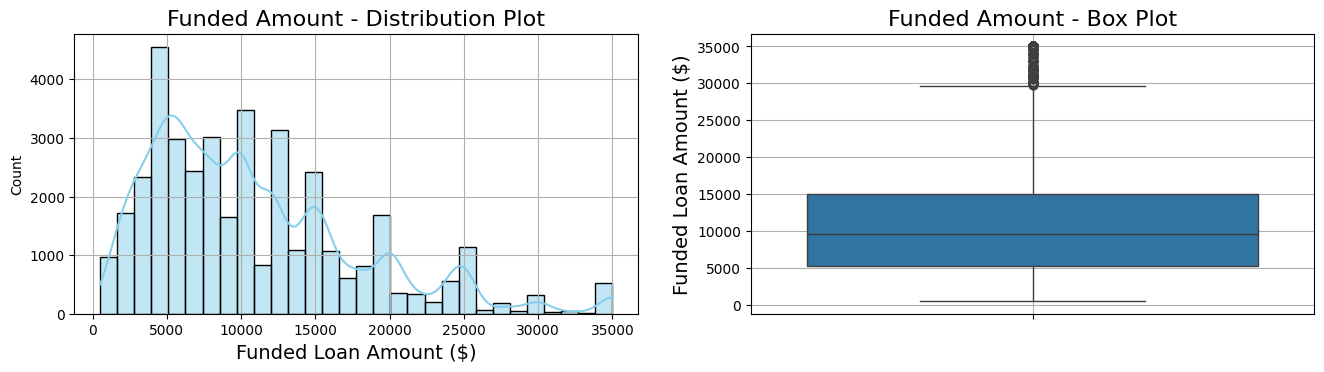

In [22]:
# Analysis of feature "funded_amnt"
print(loan_data['funded_amnt'].describe())

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.histplot(data=loan_data, x='funded_amnt',bins=30, kde = True, color='skyblue')
ax.set_title('Funded Amount - Distribution Plot',fontsize=16)
ax.set_xlabel('Funded Loan Amount ($)',fontsize=14)
ax.grid(True)

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['funded_amnt'])
ax.set_title('Funded Amount - Box Plot',fontsize=16)
ax.set_ylabel('Funded Loan Amount ($)',fontsize=14)
ax.grid(True)

plt.show()

#### <b>Observation:</b>
<b>"funded_amnt": Funded Amount Amount feature analysis</b>
- Funded amount is mostly correlated to Loan Amount

*************************

count   38577.00
mean    10222.48
std      7022.72
min         0.00
25%      5000.00
50%      8733.44
75%     14000.00
max     35000.00
Name: funded_amnt_inv, dtype: float64


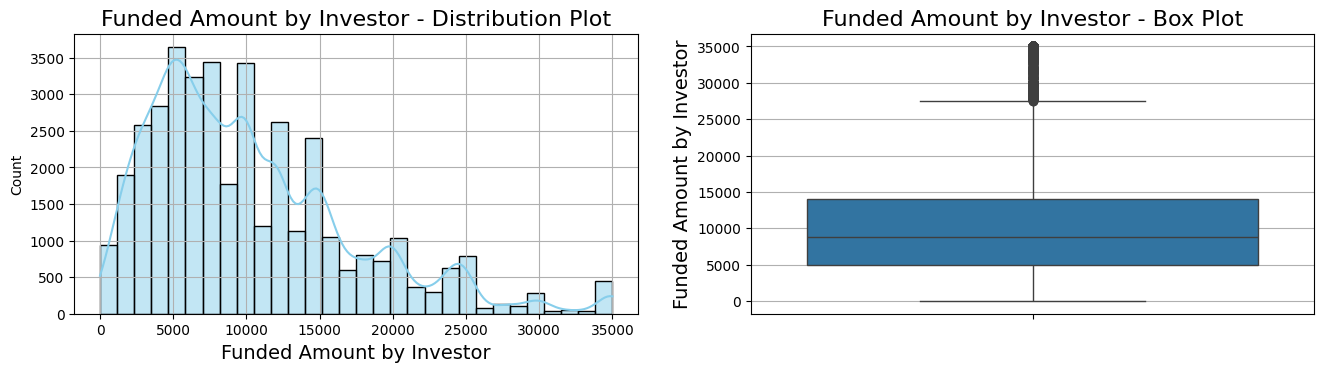

In [23]:
# Analysis of feature "funded_amnt_inv"
print(loan_data['funded_amnt_inv'].describe())

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.histplot(data=loan_data, x='funded_amnt_inv', kde = True, bins=30, color='skyblue')
ax.set_title('Funded Amount by Investor - Distribution Plot',fontsize=16)
ax.set_xlabel('Funded Amount by Investor',fontsize=14)
ax.grid()

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['funded_amnt_inv'])
ax.set_title('Funded Amount by Investor - Box Plot',fontsize=16)
ax.set_ylabel('Funded Amount by Investor',fontsize=14)
ax.grid(axis='y')

plt.show()

count   38577.00
mean      322.47
std       208.64
min        15.69
25%       165.74
50%       277.86
75%       425.55
max      1305.19
Name: installment, dtype: float64


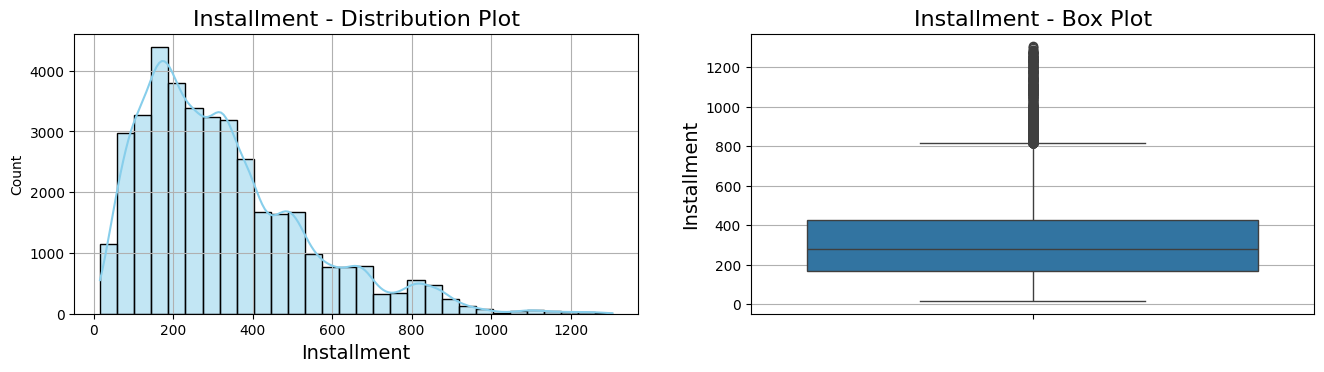

In [24]:
# Analysis of feature "installment"
print(loan_data['installment'].describe())

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.histplot(data=loan_data, x='installment', kde = True, bins=30, color='skyblue')
ax.set_title('Installment - Distribution Plot',fontsize=16)
ax.set_xlabel('Installment',fontsize=14)
ax.grid()

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['installment'])
ax.set_title('Installment - Box Plot',fontsize=16)
ax.set_ylabel('Installment',fontsize=14)
ax.grid(axis='y')

plt.show()

#### <b>Observation:</b>
<b>"installment": Instalment Amount feature analysis</b>
- Most of the Installment amounts are between 167 - 430
- The highest amount of instalment paid by some is 1305.19 and the lowest instalment paid by someone is 15.69

*************************

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64


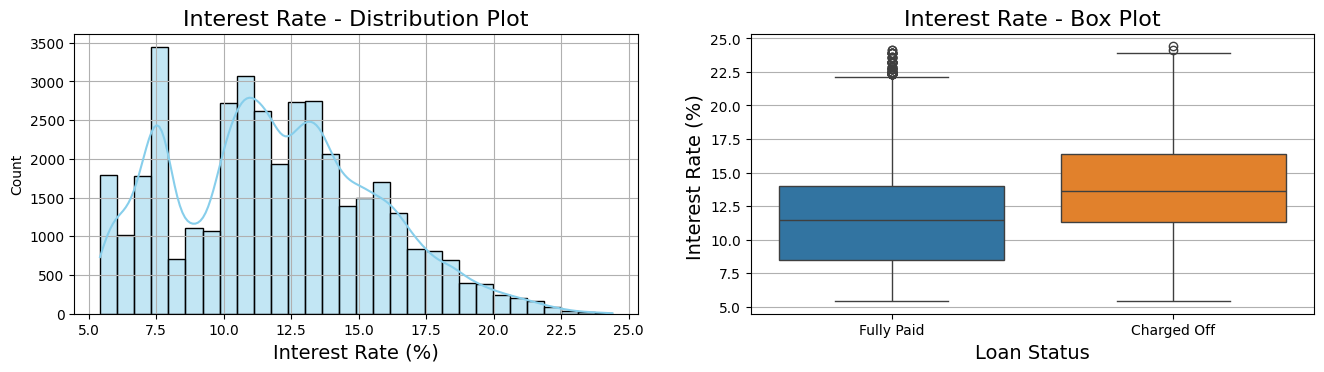

*********************************************************************
               count  mean  std  min   25%   50%   75%   max
loan_status                                                 
Charged Off  5627.00 13.82 3.65 5.42 11.31 13.61 16.40 24.40
Fully Paid  32950.00 11.61 3.60 5.42  8.49 11.49 13.99 24.11


In [25]:
# Analysis of feature "int_rate"
print(loan_data['int_rate'].describe())

# let's analyse the data

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.histplot(data=loan_data, x='int_rate', kde=True, bins=30, color='skyblue')
ax.set_title('Interest Rate - Distribution Plot',fontsize=16)
ax.set_xlabel('Interest Rate (%)',fontsize=14)
ax.grid()

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['int_rate'], x=loan_data['loan_status'], hue=loan_data['loan_status'])
ax.set_title('Interest Rate - Box Plot',fontsize=16)
ax.set_ylabel('Interest Rate (%) ',fontsize=14)
ax.set_xlabel('Loan Status',fontsize=14)
ax.grid(axis='y')

plt.show()

print("*********************************************************************")
print(loan_data.groupby('loan_status')['int_rate'].describe())

#### <b>Observation:</b>
<b>"int_rate": Interest Rate feature analysis</b>
- Overall, the interest rate varies from 5.42% to 24.4% with an average interest rate of 11.8%.
- The majority of loan applications have 9.25% to 14.59% of interest rate
- From the Distribution plot, we got the insights that as the interest rate goes beyond 14.59% the number of loan applications decreasing
- The interest rate for Charged Off loans appears to be higher than for Fully paid. This is naturally expected. As the risk increases the rate of interest imposed on the loan also increases.


*************************

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64


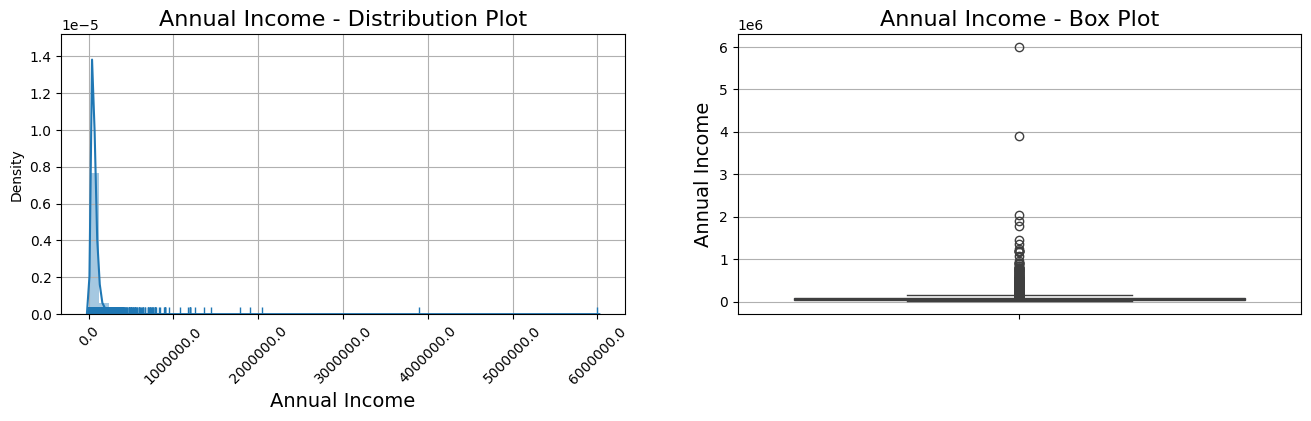

In [26]:
loan_data['annual_inc'] = loan_data['annual_inc'].apply(lambda x: f"{x:.0f}").astype(int)

print(loan_data['annual_inc'].describe())

# Specifying plot size
plt.figure(figsize=(16, 8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['annual_inc'], rug=True)
ax.set_title('Annual Income - Distribution Plot', fontsize=16)
ax.set_xlabel('Annual Income', fontsize=14)
ax.set_xticklabels(ax.get_xticks(), rotation=45)  # Rotate x-axis labels for better readability
ax.grid()

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['annual_inc'])
ax.set_title('Annual Income - Box Plot', fontsize=16)
ax.set_ylabel('Annual Income', fontsize=14)
ax.grid(axis='y')

plt.show()

count    36654.00
mean     60855.75
std      27750.28
min       4000.00
25%      40000.00
50%      56000.00
75%      77970.50
max     140004.00
Name: annual_inc, dtype: float64


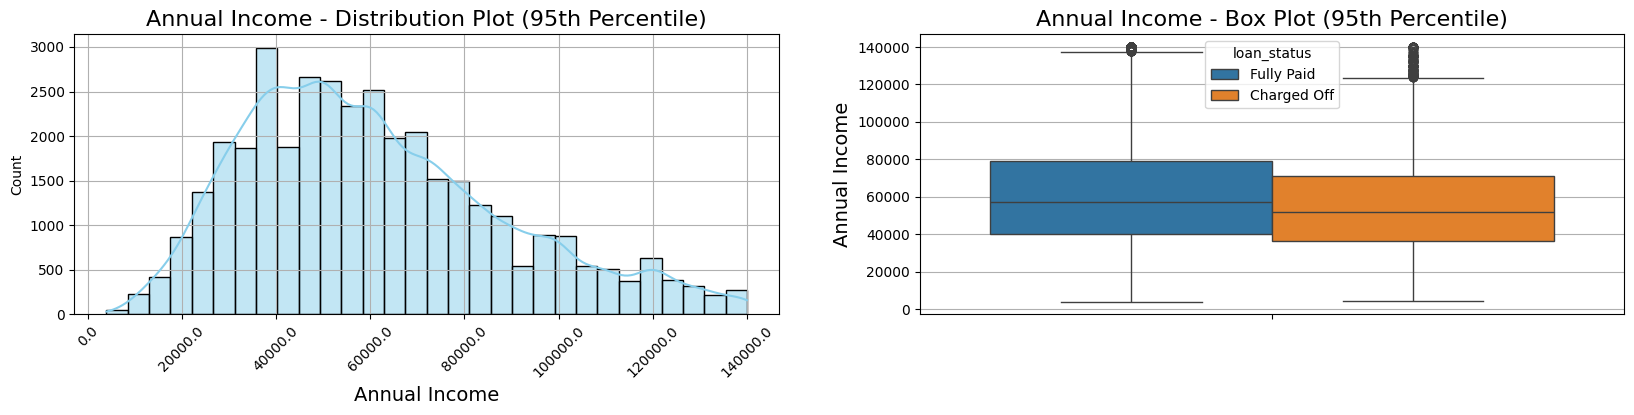

In [27]:
# Finding the 95th percentile of 'annual_inc'
percentile_95 = loan_data['annual_inc'].quantile(0.95)

# Removing data points above the 95th percentile
loan_data_no_outliers = loan_data[loan_data['annual_inc'] <= percentile_95]

print(loan_data_no_outliers['annual_inc'].describe())

# Creating a new cell for visualization
plt.figure(figsize=(20, 8))

# Distribution Plot after removing outliers above 95th percentile
plt.subplot(2, 2, 3)
ax = sns.histplot(data=loan_data_no_outliers, x='annual_inc', kde=True, bins=30, color='skyblue')
ax.set_title('Annual Income - Distribution Plot (95th Percentile)', fontsize=16)
ax.set_xlabel('Annual Income', fontsize=14)
ax.set_xticklabels(ax.get_xticks(), rotation=45)  # Rotate x-axis labels for better readability
ax.grid()

# Box Plot after removing outliers above 95th percentile
plt.subplot(2, 2, 4)
ax = sns.boxplot(y=loan_data_no_outliers['annual_inc'], hue=loan_data.loan_status)
ax.set_title('Annual Income - Box Plot (95th Percentile)', fontsize=16)
ax.set_ylabel('Annual Income', fontsize=14)
ax.grid(axis='y')

plt.show()


#### <b>Observation:</b>
<b>"annual_inc": Annual Income feature analysis</b>
- The majority of loan applicants have an annual income of 40000 to 78000
- People who default have less avg income than others 

*************************

### <b>Categorial Data Analysis</b>

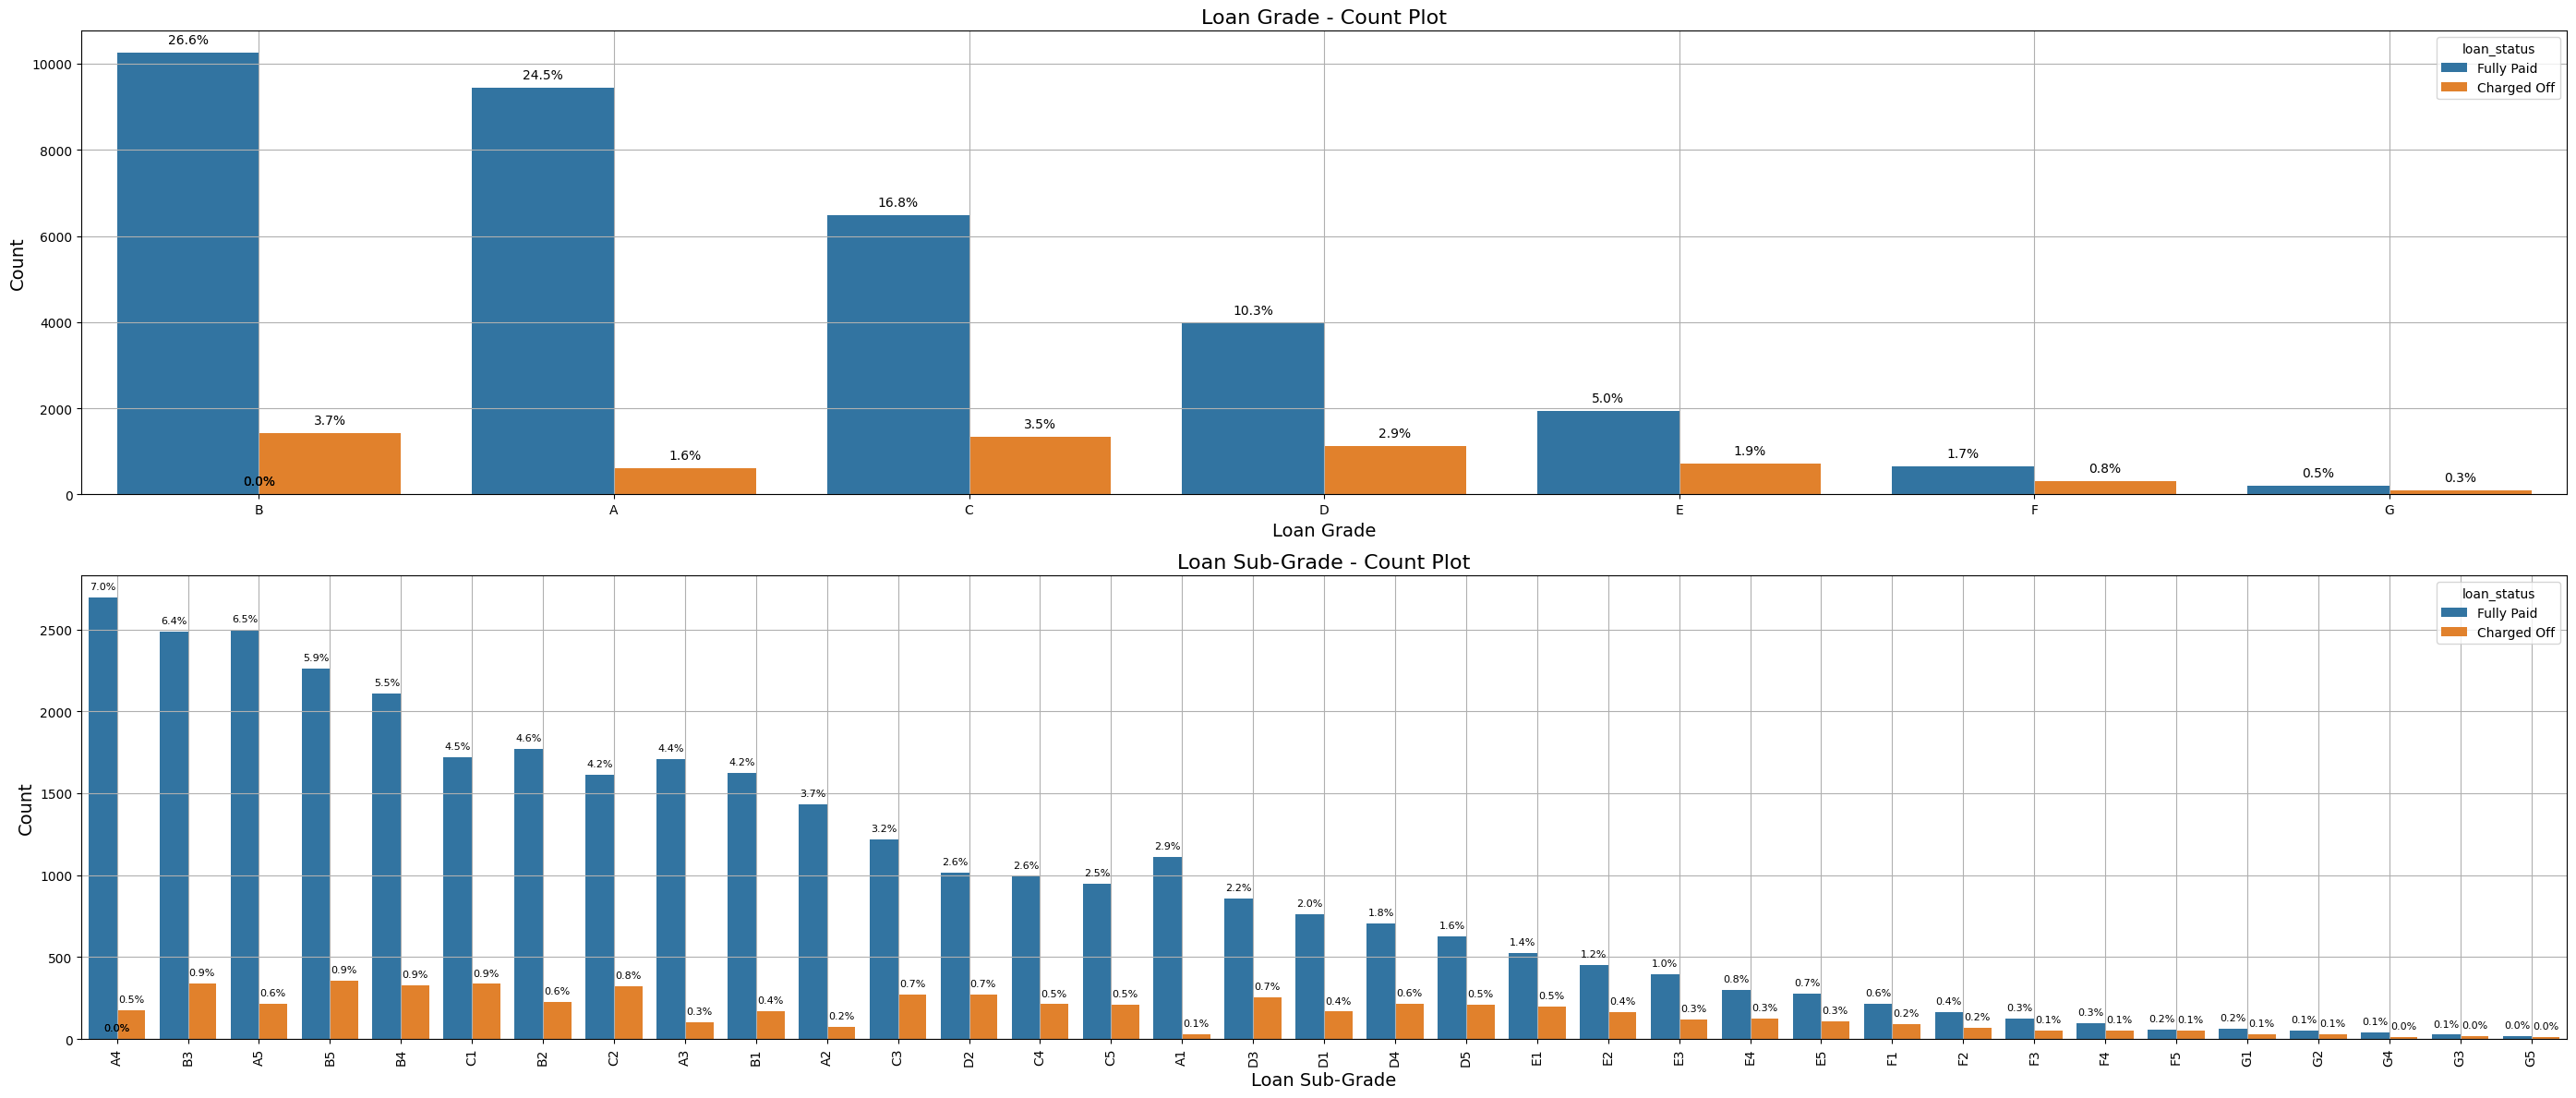

In [28]:
# Analysis of feature "grade" and "sub_grade"

# Specifying plot size
fig, ax = plt.subplots(2, 1, figsize=(28, 12))

# Subplot 1: Count Plot for "grade"
bx1 = sns.countplot(x=loan_data.grade, order=loan_data.grade.value_counts().index, ax=ax[0], hue=loan_data.loan_status)
bx1.set_title('Loan Grade - Count Plot', fontsize=16)
bx1.set_xlabel('Loan Grade', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)
bx1.grid()

# Calculate percentages for "grade"
total_grade = len(loan_data.grade)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.1f}%'.format(100 * height / total_grade), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Subplot 2: Count Plot for "sub_grade"
bx2 = sns.countplot(x=loan_data.sub_grade, order=loan_data.sub_grade.value_counts().index, ax=ax[1], hue=loan_data.loan_status)
bx2.set_title('Loan Sub-Grade - Count Plot', fontsize=16)
bx2.set_xlabel('Loan Sub-Grade', fontsize=14)
bx2.set_ylabel('Count', fontsize=14)
bx2.tick_params(axis='x', rotation=90)  # Rotate x-axis labels
bx2.grid()

# Calculate percentages for "sub_grade"
total_sub_grade = len(loan_data.sub_grade)
for p in bx2.patches:
    height = p.get_height()
    bx2.annotate('{:.1f}%'.format(100 * height / total_sub_grade), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### <b>Observation:</b>
<b>"grade" and "sub_grade" features analysis</b>
- Most of the loan applications are categorised as grade "B" or "A" or "C"
- It less chance to loan to default if it grade is "A"
- 30 % of applications categorised under grade "B" and 25% of applications categorised under "A"

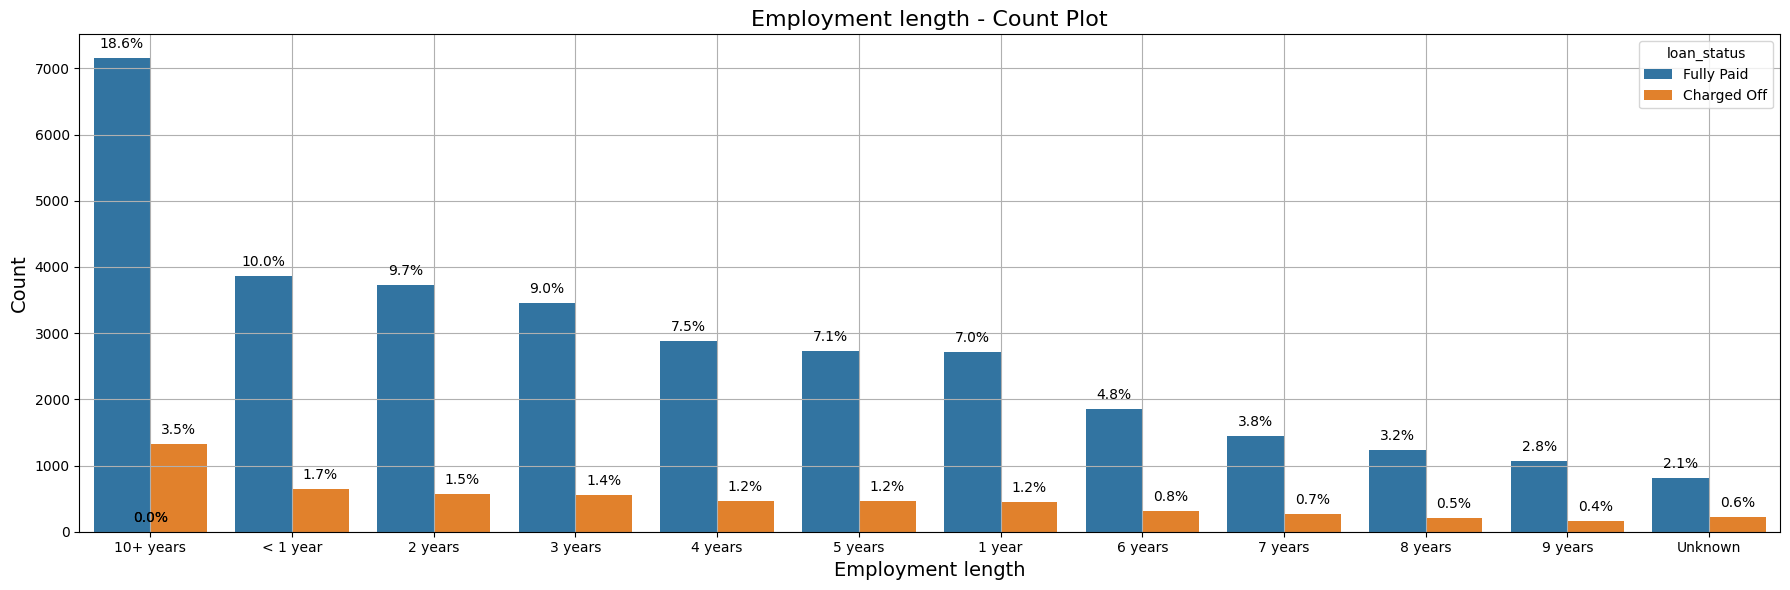

In [29]:
# Analysis of feature "emp_length"

# Specifying plot size
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

# Subplot 1: Count Plot with percentage
bx1 = sns.countplot(x=loan_data.emp_length, order=loan_data.emp_length.value_counts().index, hue=loan_data.loan_status)
bx1.set_title('Employment length - Count Plot', fontsize=16)
bx1.set_xlabel('Employment length', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)
bx1.grid()

# Calculate percentages
total = len(loan_data.emp_length)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.1f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout() 
plt.show()

#### <b>Observation:</b>
<b>"emp_length": Employment length features analysis</b>
- Employment length appears to be inversely correlated with the likelihood of loan default, indicating that longer employment tenure might reduce the risk of default.
- Most of the people who apply for loans have experience of 10+ years
- Of all applicants, more than 22% applicant have 10+ years of experience
- 2.7% of applicants didn't provide their employment length

*******************************

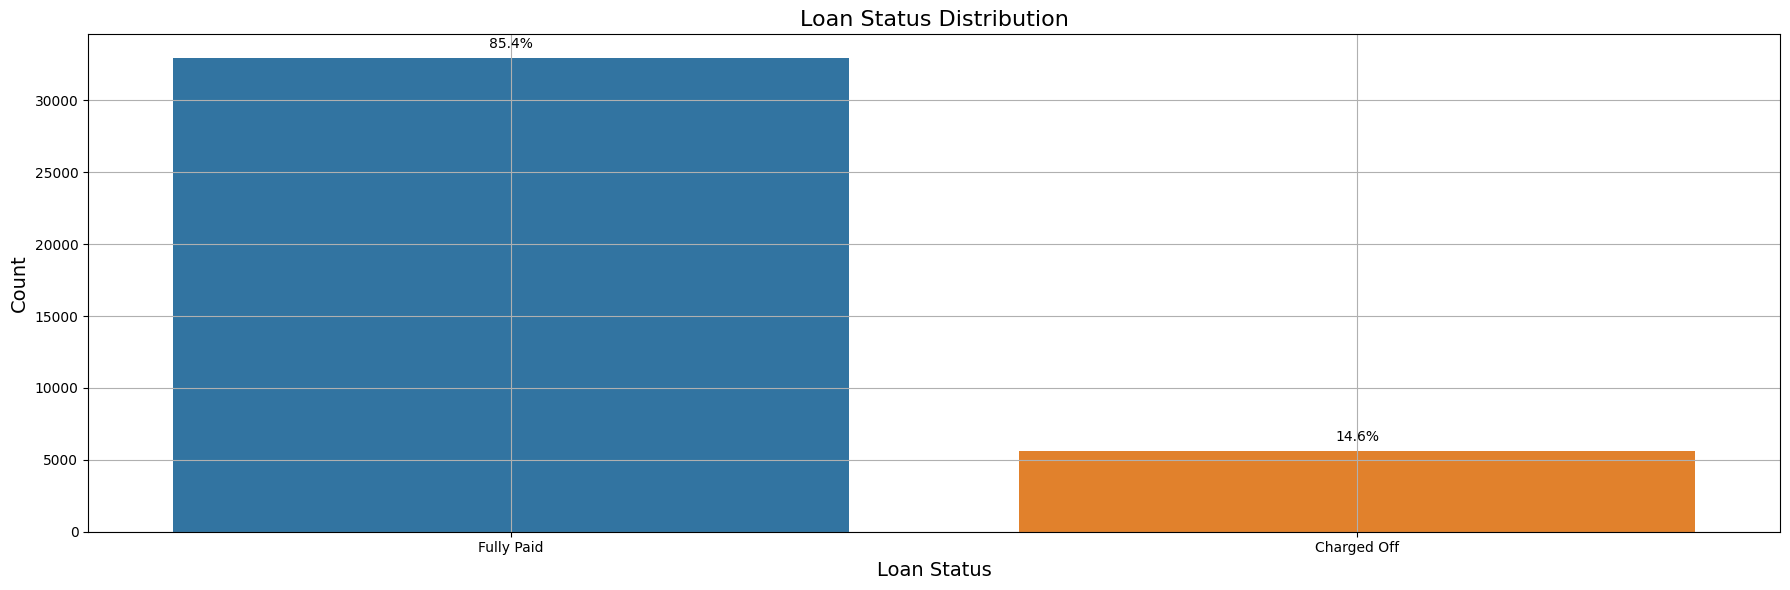

In [30]:
# Analysis of feature "loan_status"

# Specifying plot size
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

# Subplot 1: Count Plot with percentage
bx1 = sns.countplot(x=loan_data.loan_status, order=loan_data.loan_status.value_counts().index, hue=loan_data.loan_status)
bx1.set_title('Loan Status Distribution', fontsize=16)
bx1.set_xlabel('Loan Status', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)
bx1.grid()

# Calculate percentages
total = len(loan_data.loan_status)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.1f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.savefig("purpose.png", transparent=True)
plt.show()

#### <b>Observation:</b>
<b>"loan_status": Loan Status features analysis</b>
- LC has failed to recover 14.6% loans

*******************************

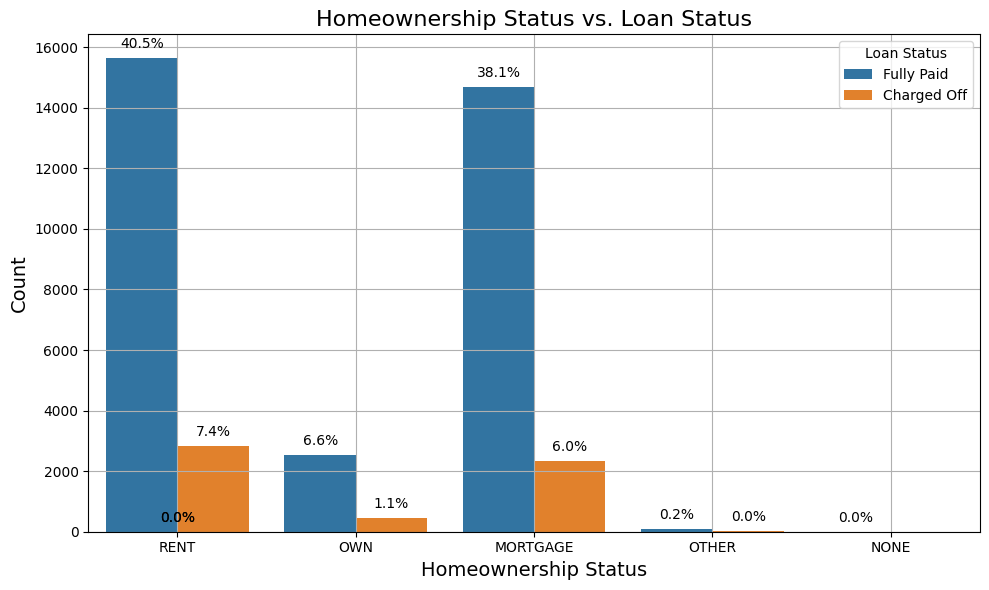

In [31]:
# Analysis of homeownership status and loan default

# Specifying plot size
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Creating count plot
ax1 = sns.countplot(x='home_ownership', hue='loan_status', data=loan_data)
ax1.set_title('Homeownership Status vs. Loan Status', fontsize=16)
ax1.set_xlabel('Homeownership Status', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.grid(True)
ax1.legend(title='Loan Status')

# Calculate percentages
total = len(loan_data.loan_status)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate('{:.1f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


#### <b>Observation:</b>
<b>"home_ownership": Home Ownership features analysis</b>
- Homeowners tend to have a higher proportion of fully paid loans compared to renters. This suggests that homeownership status may be a significant factor in reducing the likelihood of loan default.
- Renters exhibit a higher proportion of charged-off loans compared to homeowners. This implies that renters may pose a higher risk of loan default compared to homeowners, possibly due to factors such as financial stability or creditworthiness.

*******************************

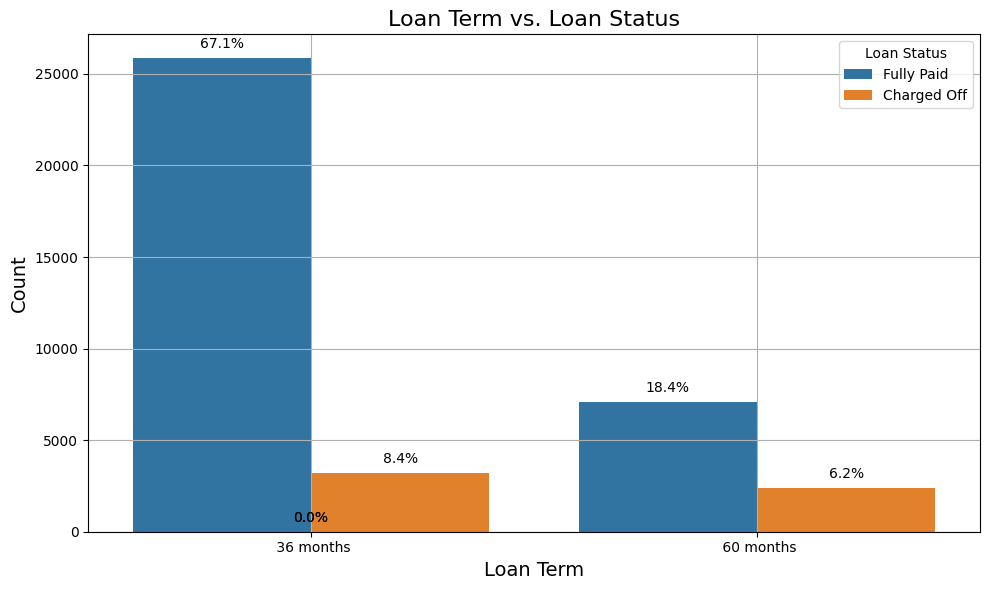

In [32]:
# Analysis of loan term and loan default

# Specifying plot size
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Creating count plot
ax1 = sns.countplot(x='term', hue='loan_status', data=loan_data)
ax1.set_title('Loan Term vs. Loan Status', fontsize=16)
ax1.set_xlabel('Loan Term', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.grid(True)
ax1.legend(title='Loan Status')

# Calculate percentages
total = len(loan_data.loan_status)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate('{:.1f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


#### <b>Observation:</b>
<b>"home_ownership": Home Ownership features analysis</b>
- The length of the loan term is inversely related to default rates, with longer-term loans having higher default rates compared to shorter-term loans.
- This suggests that longer repayment periods may increase the risk of default.

*******************************

### <b>Biavariate Analysis</b>

In [33]:
# Creating seperate list of categorical and numerical value columns
loan_num_cols = (loan_data.select_dtypes(include=np.number)).columns
loan_cat_cols = (loan_data.select_dtypes(include=np.object_)).columns

loan_num_cols = loan_num_cols.drop('id')

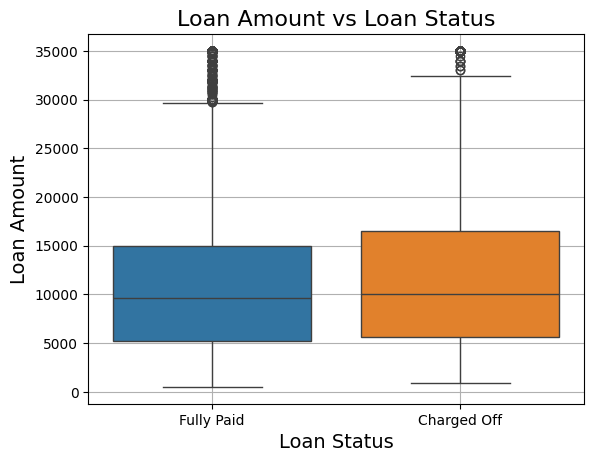

In [34]:
# Effectt of loan_amnt on loan status

ax = sns.boxplot(x=loan_data.loan_status, y= loan_data.loan_amnt, hue=loan_data.loan_status)
ax.set_title("Loan Amount vs Loan Status", fontsize=16)
ax.set_ylabel("Loan Amount", fontsize=14)
ax.set_xlabel("Loan Status", fontsize=14)
ax.grid()

plt.show()

#### <b>Observation:</b>
- No significant difference beatween deaulter and non-defaulters loan amount

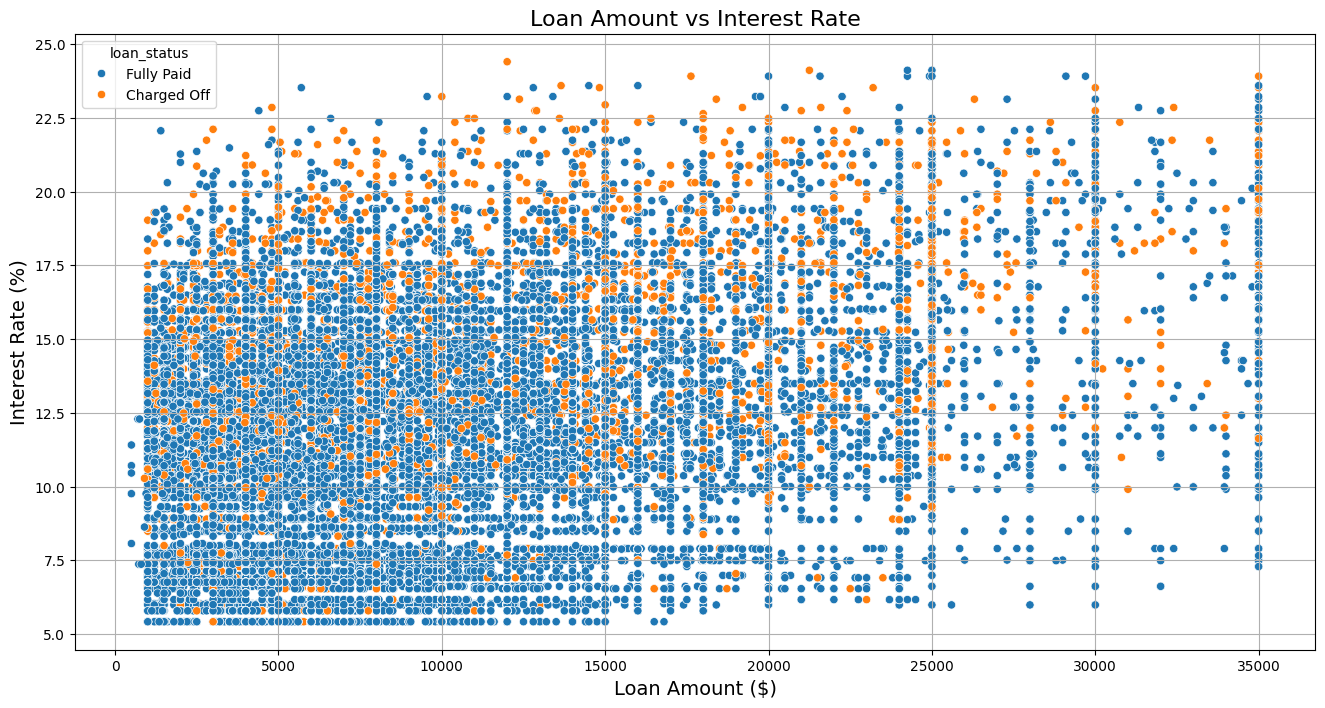

In [35]:
# Relation between Loan Amount and Interest Rate
plt.figure(figsize=(16, 8))
bx1 = sns.scatterplot(x="loan_amnt", y='int_rate',hue="loan_status", data=loan_data)
bx1.set_title('Loan Amount vs Interest Rate', fontsize=16)
bx1.set_xlabel('Loan Amount ($)', fontsize=14)
bx1.set_ylabel('Interest Rate (%)', fontsize=14)
bx1.grid()

plt.savefig("int_rate_vs_loan_amt.png", transparent=True)
plt.show()


#### <b>Observation:</b>

- The interest rate for Charged Off loans appears to be higher than for Fully paid. This is naturally expected. As the risk increases the rate of interest imposed on the loan also increases.
- This also impacts on the loan amount as higher loan amount and higher interest rates lead to the charged-off 


*************************


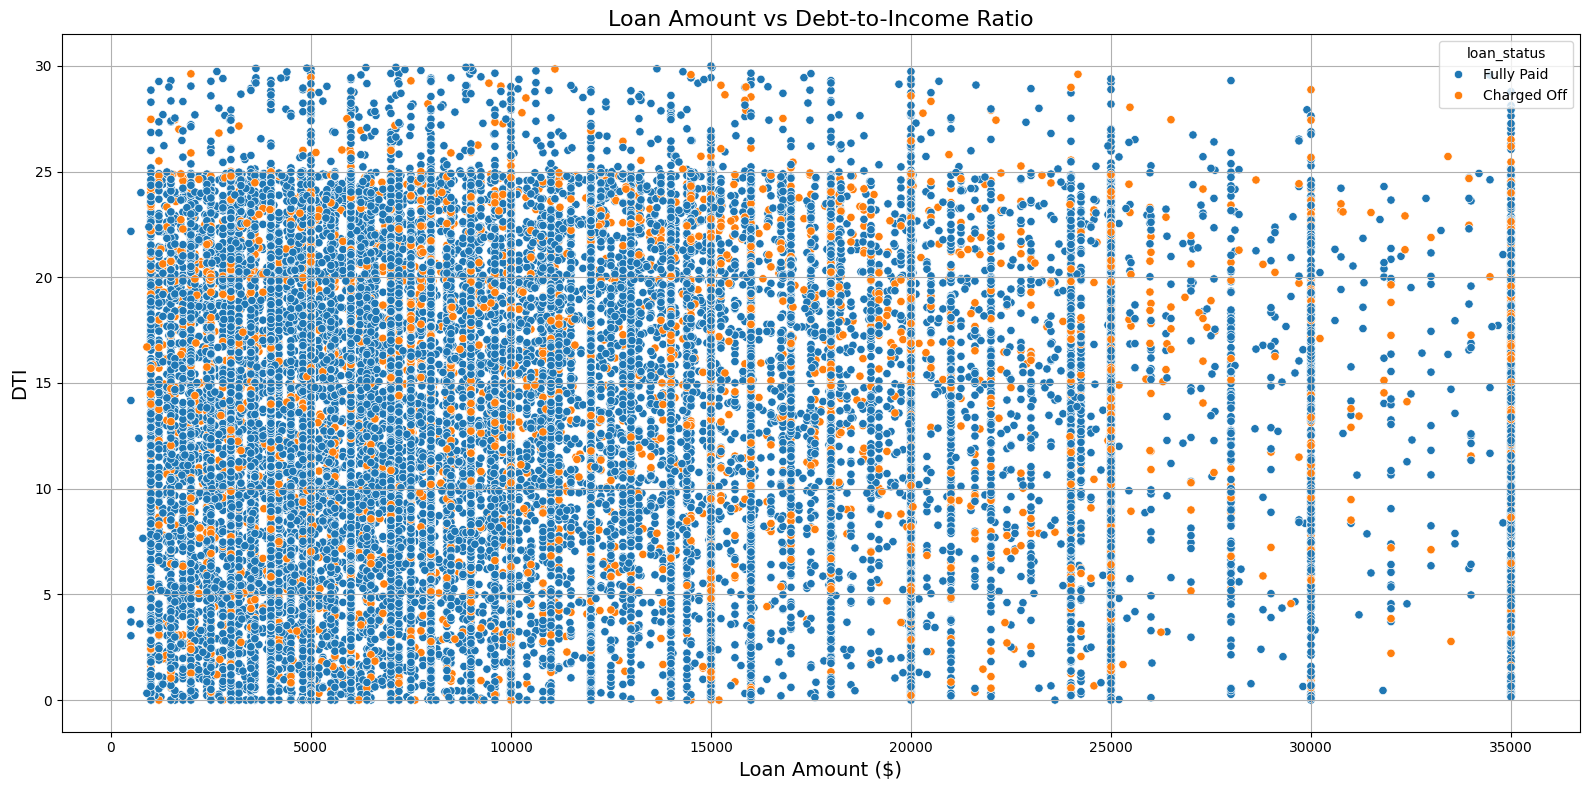

In [36]:
# Relation between Loan Amount and DTI

plt.figure(figsize=(16, 8))
bx1 = sns.scatterplot(x="loan_amnt", y='dti',hue="loan_status", data=loan_data)
bx1.set_title('Loan Amount vs Debt-to-Income Ratio', fontsize=16)
bx1.set_xlabel('Loan Amount ($)', fontsize=14)
bx1.set_ylabel('DTI', fontsize=14)
bx1.grid()

plt.tight_layout()
plt.savefig("dti.png", transparent=True)
plt.show()


#### <b>Observation:</b>

- Higher the DTI higher the chances of the loan being Charged Off

*************************


pub_rec_bankruptcies
0.00        36238
1.00         1637
 Unknown      697
2.00            5
Name: count, dtype: int64


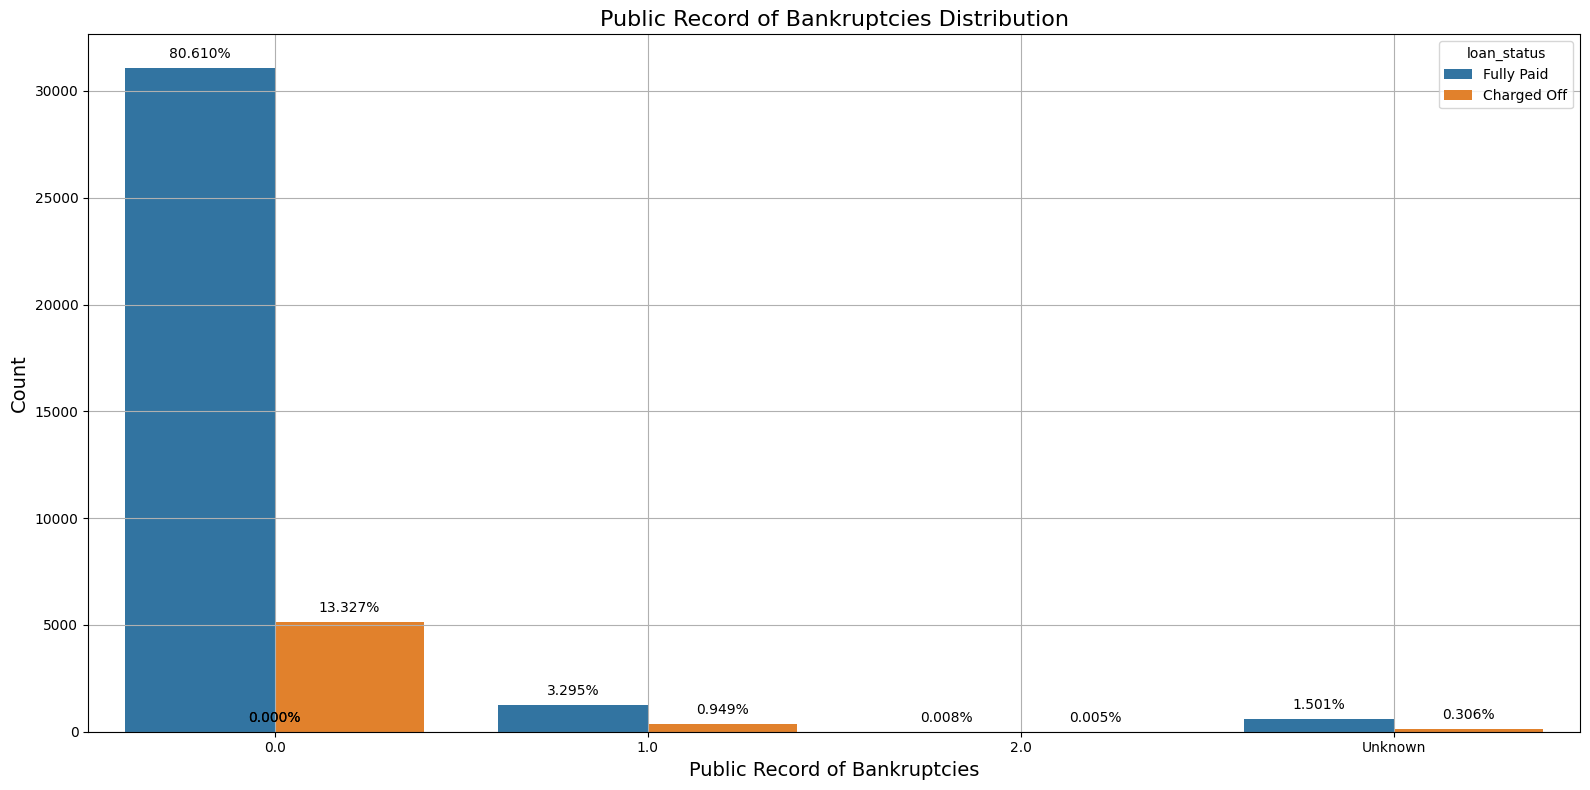

In [37]:
# Effect of pub_rec_bankruptcies on loan status
print(loan_data.pub_rec_bankruptcies.value_counts())

plt.figure(figsize=(16, 8))
bx1 = sns.countplot(x="pub_rec_bankruptcies", hue="loan_status", data=loan_data, stat="count")
bx1.set_title('Public Record of Bankruptcies Distribution', fontsize=16)
bx1.set_xlabel('Public Record of Bankruptcies', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)
bx1.grid()

# Calculate percentages
total = len(loan_data.loan_status)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.3f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

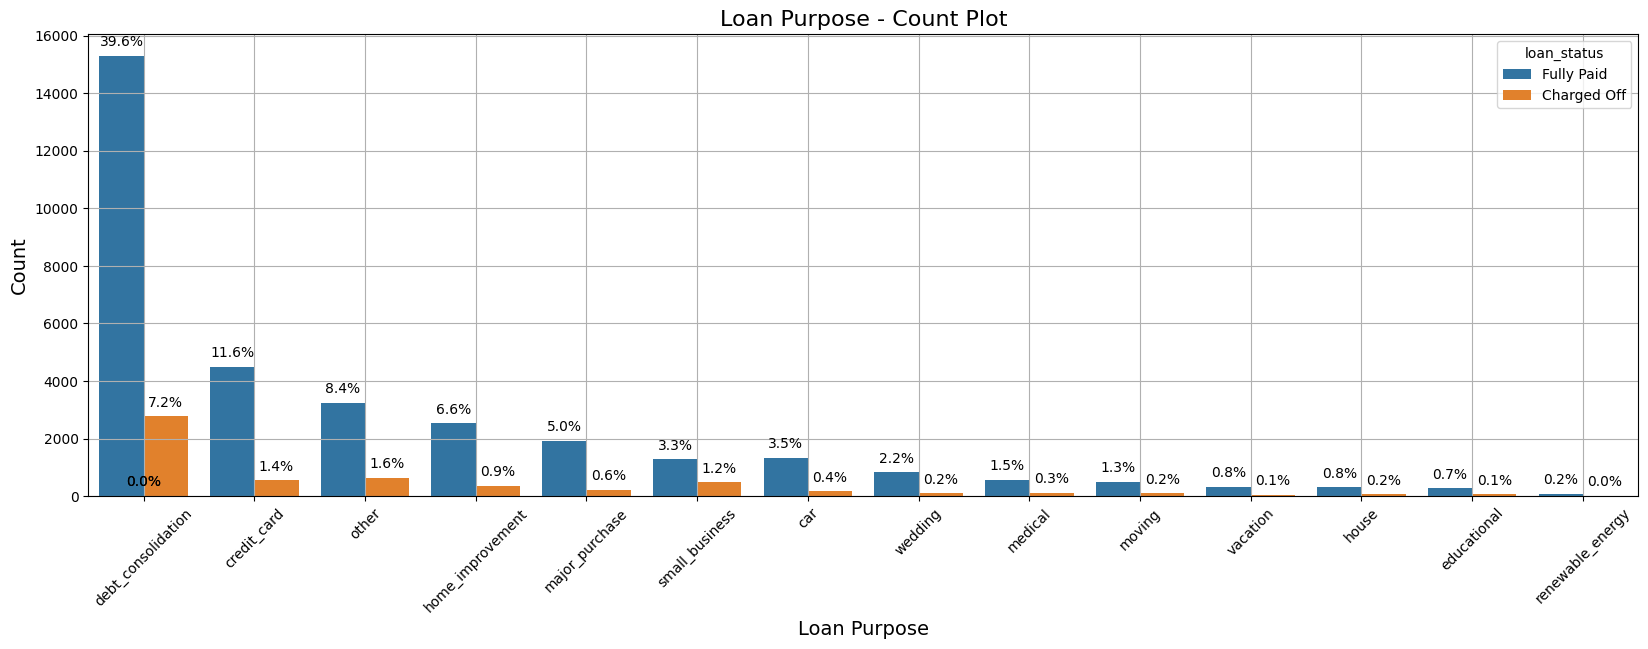

In [38]:
# Analysis of feature "purpose"

# Specifying plot size
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

# Subplot 1: Count Plot with percentage
bx1 = sns.countplot(x=loan_data.purpose, order=loan_data.purpose.value_counts().index, hue=loan_data.loan_status)
bx1.set_title('Loan Purpose - Count Plot', fontsize=16)
bx1.set_xlabel('Loan Purpose', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)
bx1.tick_params(axis='x', rotation=45)
bx1.grid()

# Calculate percentages
total = len(loan_data.purpose)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.1f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')


plt.show()

#### <b>"purpose": Loan Purpose features analysis</b>
- ~25% chance that small business loan will be default
- Most people take loans for debt consolidation

*******************************

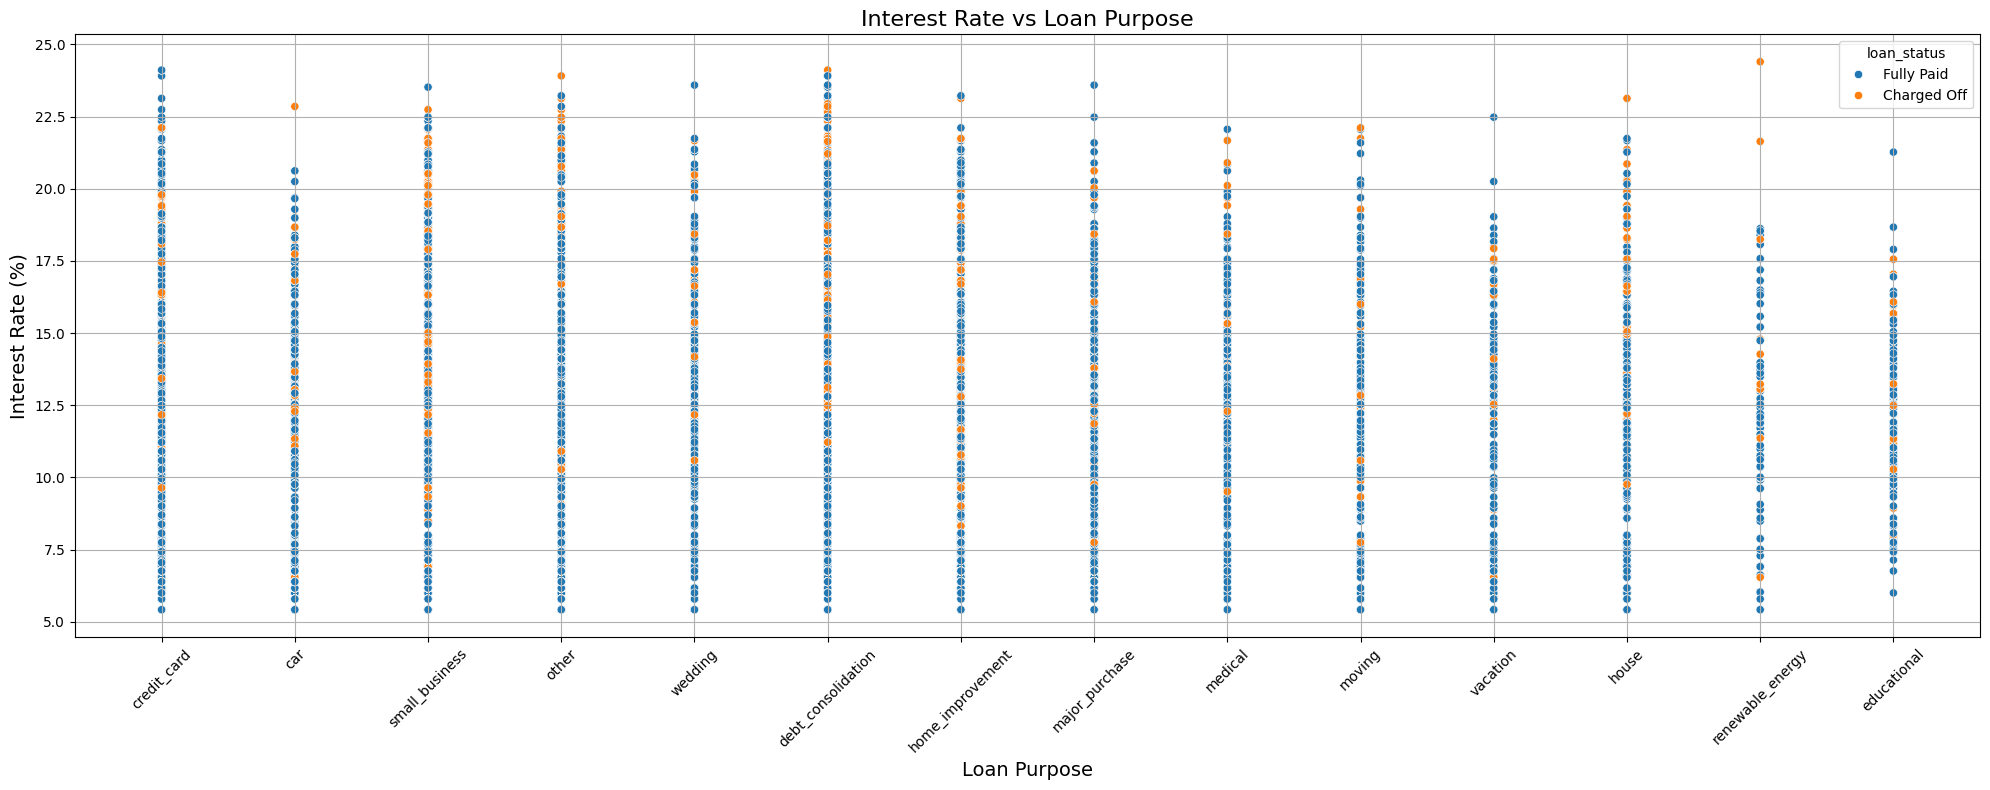

In [39]:
# Relation between Loan Interest Rate and Purpose

plt.figure(figsize=(20, 8))
bx1 = sns.scatterplot(x="purpose", y='int_rate',hue="loan_status", data=loan_data)
bx1.set_title('Interest Rate vs Loan Purpose', fontsize=16)
bx1.set_xlabel('Loan Purpose', fontsize=14)
bx1.set_ylabel('Interest Rate (%)', fontsize=14)
bx1.tick_params(axis='x', rotation=45)
bx1.grid()

plt.tight_layout()
plt.savefig("purpose_loan.png", transparent=True)
plt.show()


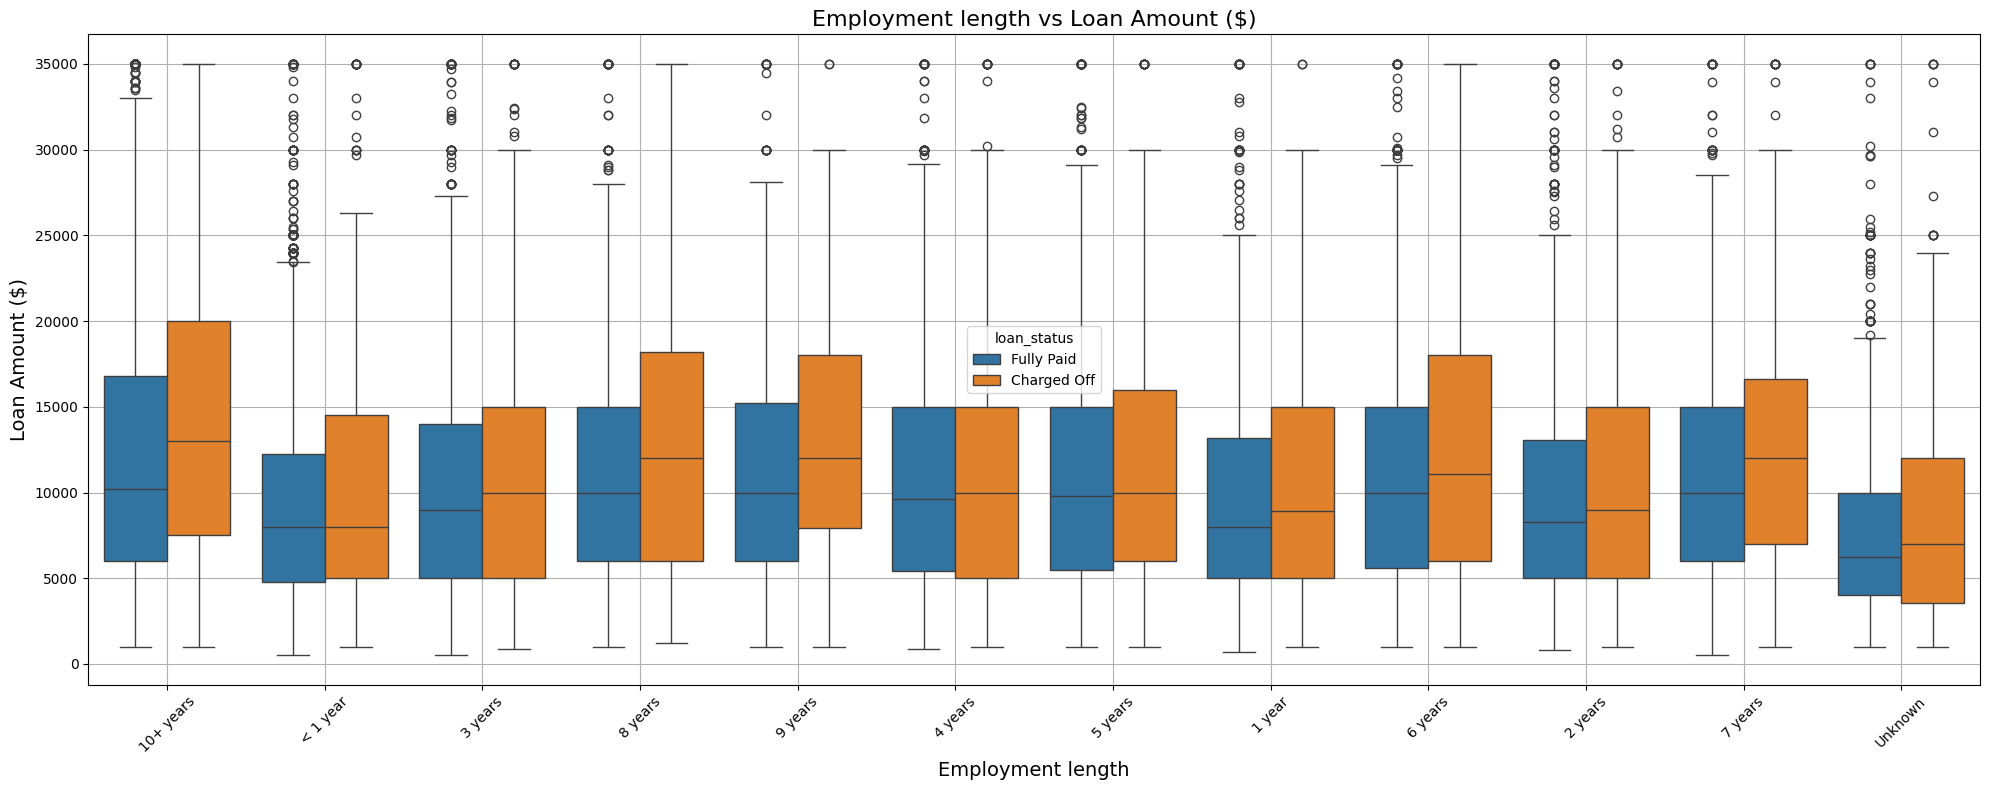

In [40]:
# Relation between Loan Amount and Employment length

plt.figure(figsize=(20, 8))
bx1 = sns.boxplot(x="emp_length", y='loan_amnt',hue="loan_status", data=loan_data)
bx1.set_title('Employment length vs Loan Amount ($)', fontsize=16)
bx1.set_xlabel('Employment length', fontsize=14)
bx1.set_ylabel('Loan Amount ($)', fontsize=14)
bx1.tick_params(axis='x', rotation=45)
bx1.grid()

plt.tight_layout()
plt.savefig("loanvsemployee.png", transparent=True)
plt.show()


#### <b>Observation:</b>

- In all employee's length the trend is similar, which indicates that the higher than average loan amount leads to the loan default but the chance of happening this are less

*************************


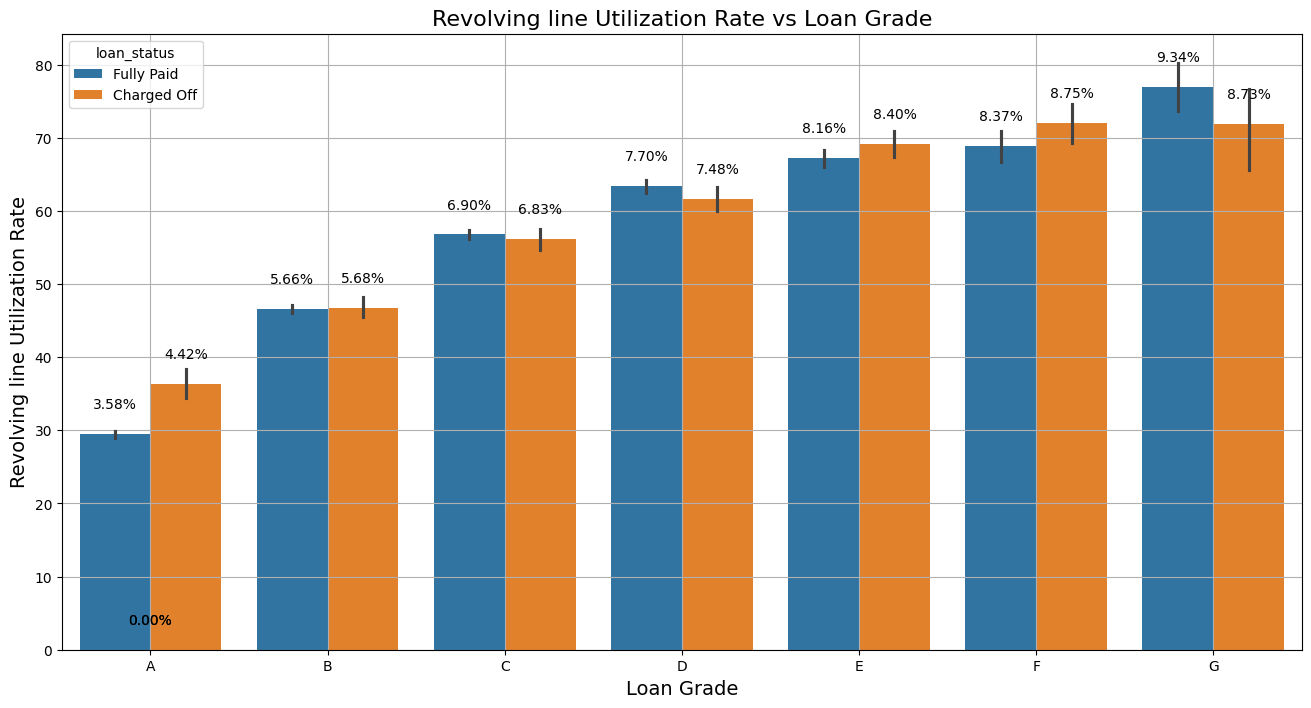

In [41]:
# Relation between Loan Grade and Revolving Rate

plt.figure(figsize=(16, 8))

br1 = sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan_data, order=loan_data.sort_values("grade").grade)
br1.set_title('Revolving line Utilization Rate vs Loan Grade', fontsize=16)
br1.set_xlabel('Loan Grade', fontsize=14)
br1.set_ylabel('Revolving line Utilization Rate', fontsize=14)
br1.grid()

# Calculate percentages
total_height = []
for p in br1.patches:
    total_height.append(p.get_height())

total_height = sum(total_height)

for p in br1.patches:
    height = p.get_height()
    br1.text(p.get_x() + p.get_width() / 2., height + 3.5, '{:.2f}%'.format((height / total_height) * 100), ha="center")

plt.show()

#### <b>Observation:</b>

- The revol_util is positively correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higher loan amounts are associated with higher grades.

*************************


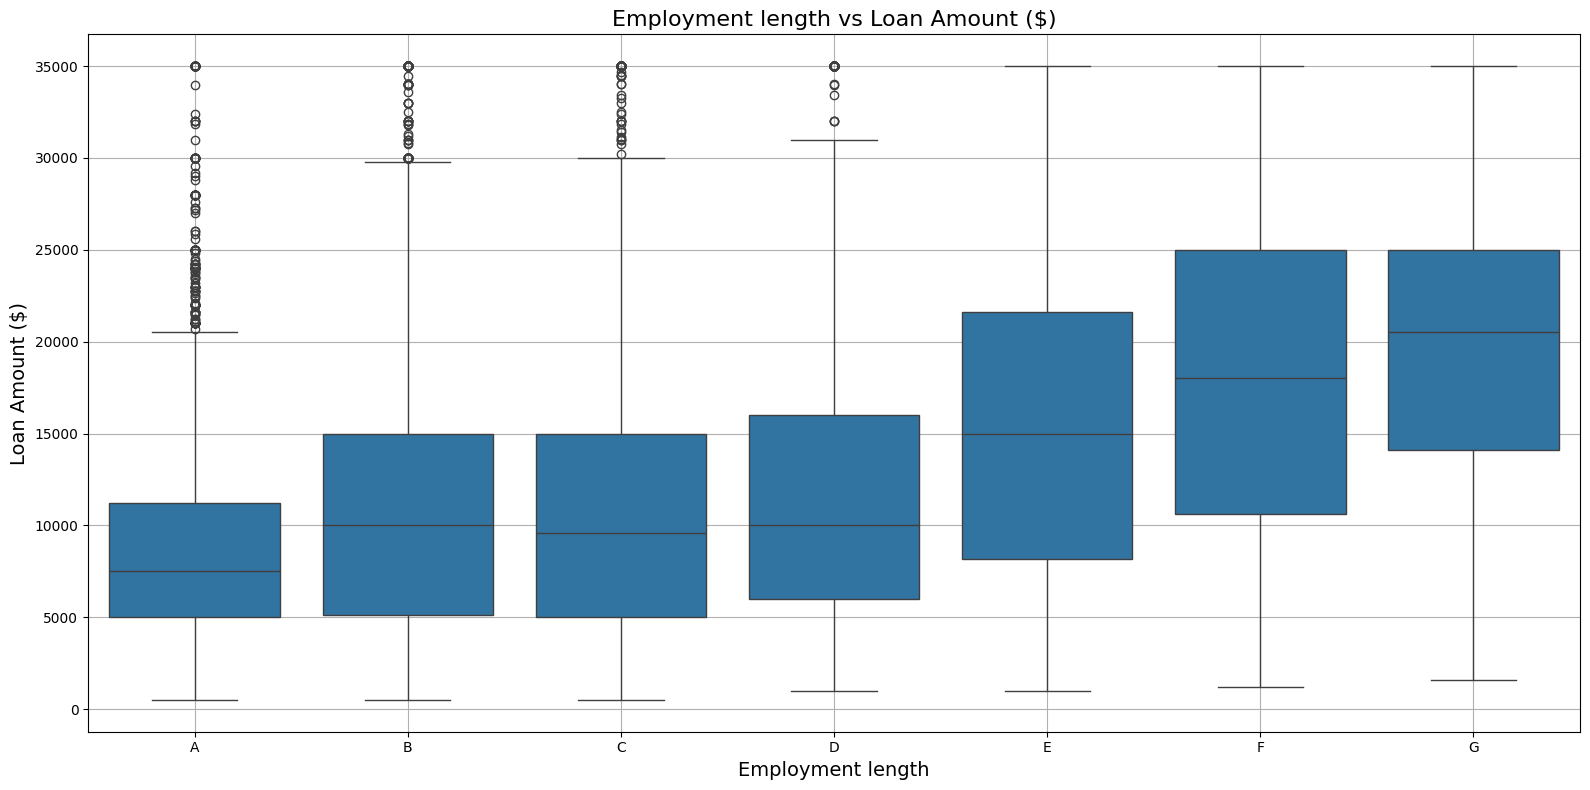

In [42]:
# Relation between Loan Amount and Loan Grade

plt.figure(figsize=(16, 8))
bx1 = sns.boxplot(x="grade", y='loan_amnt', data=loan_data, order=loan_data.sort_values("grade").grade)
bx1.set_title('Employment length vs Loan Amount ($)', fontsize=16)
bx1.set_xlabel('Employment length', fontsize=14)
bx1.set_ylabel('Loan Amount ($)', fontsize=14)
bx1.grid()

plt.tight_layout()
plt.savefig("loanvsgrade.png", transparent=True)
plt.show()


#### <b>Observation:</b>
- Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

*************************

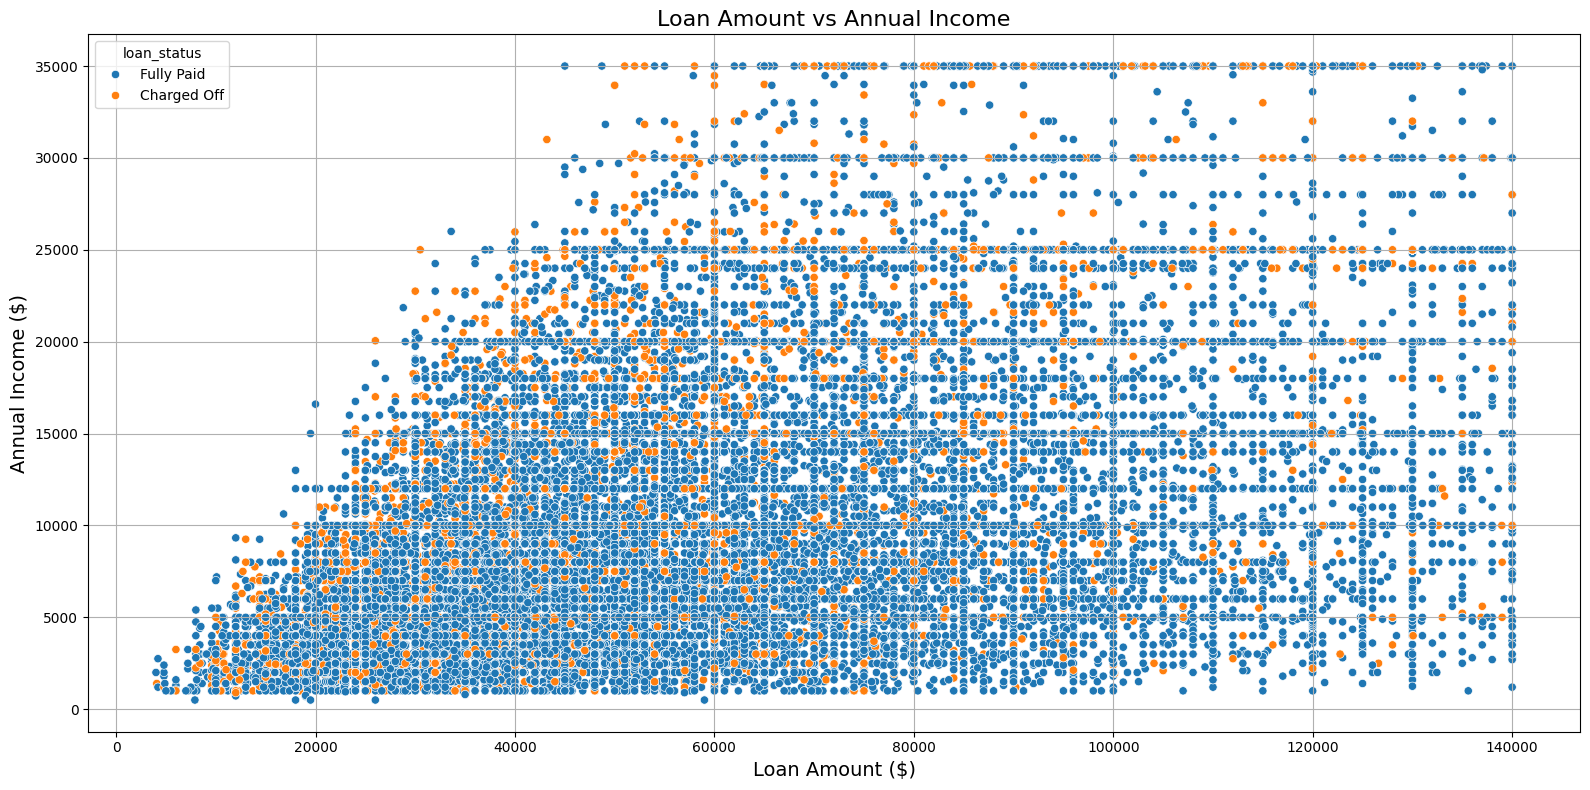

In [43]:
# Relation between Loan Amount and Anual Income

plt.figure(figsize=(16, 8))
bx1 = sns.scatterplot(x="annual_inc", y='loan_amnt',hue="loan_status", data=loan_data_no_outliers)
bx1.set_title('Loan Amount vs Annual Income', fontsize=16)
bx1.set_xlabel('Loan Amount ($)', fontsize=14)
bx1.set_ylabel('Annual Income ($)', fontsize=14)
bx1.grid()

plt.tight_layout()
plt.savefig("anual_vs_loan.png", transparent=True)
plt.show()

#### <b>Observation:</b>
- If the loan amount and annual income ratio are higher their more chance of defaulting the loan
- We can verify this in future analysis in derived matrix

*************************

### <b>Multivariate Metrics</b>

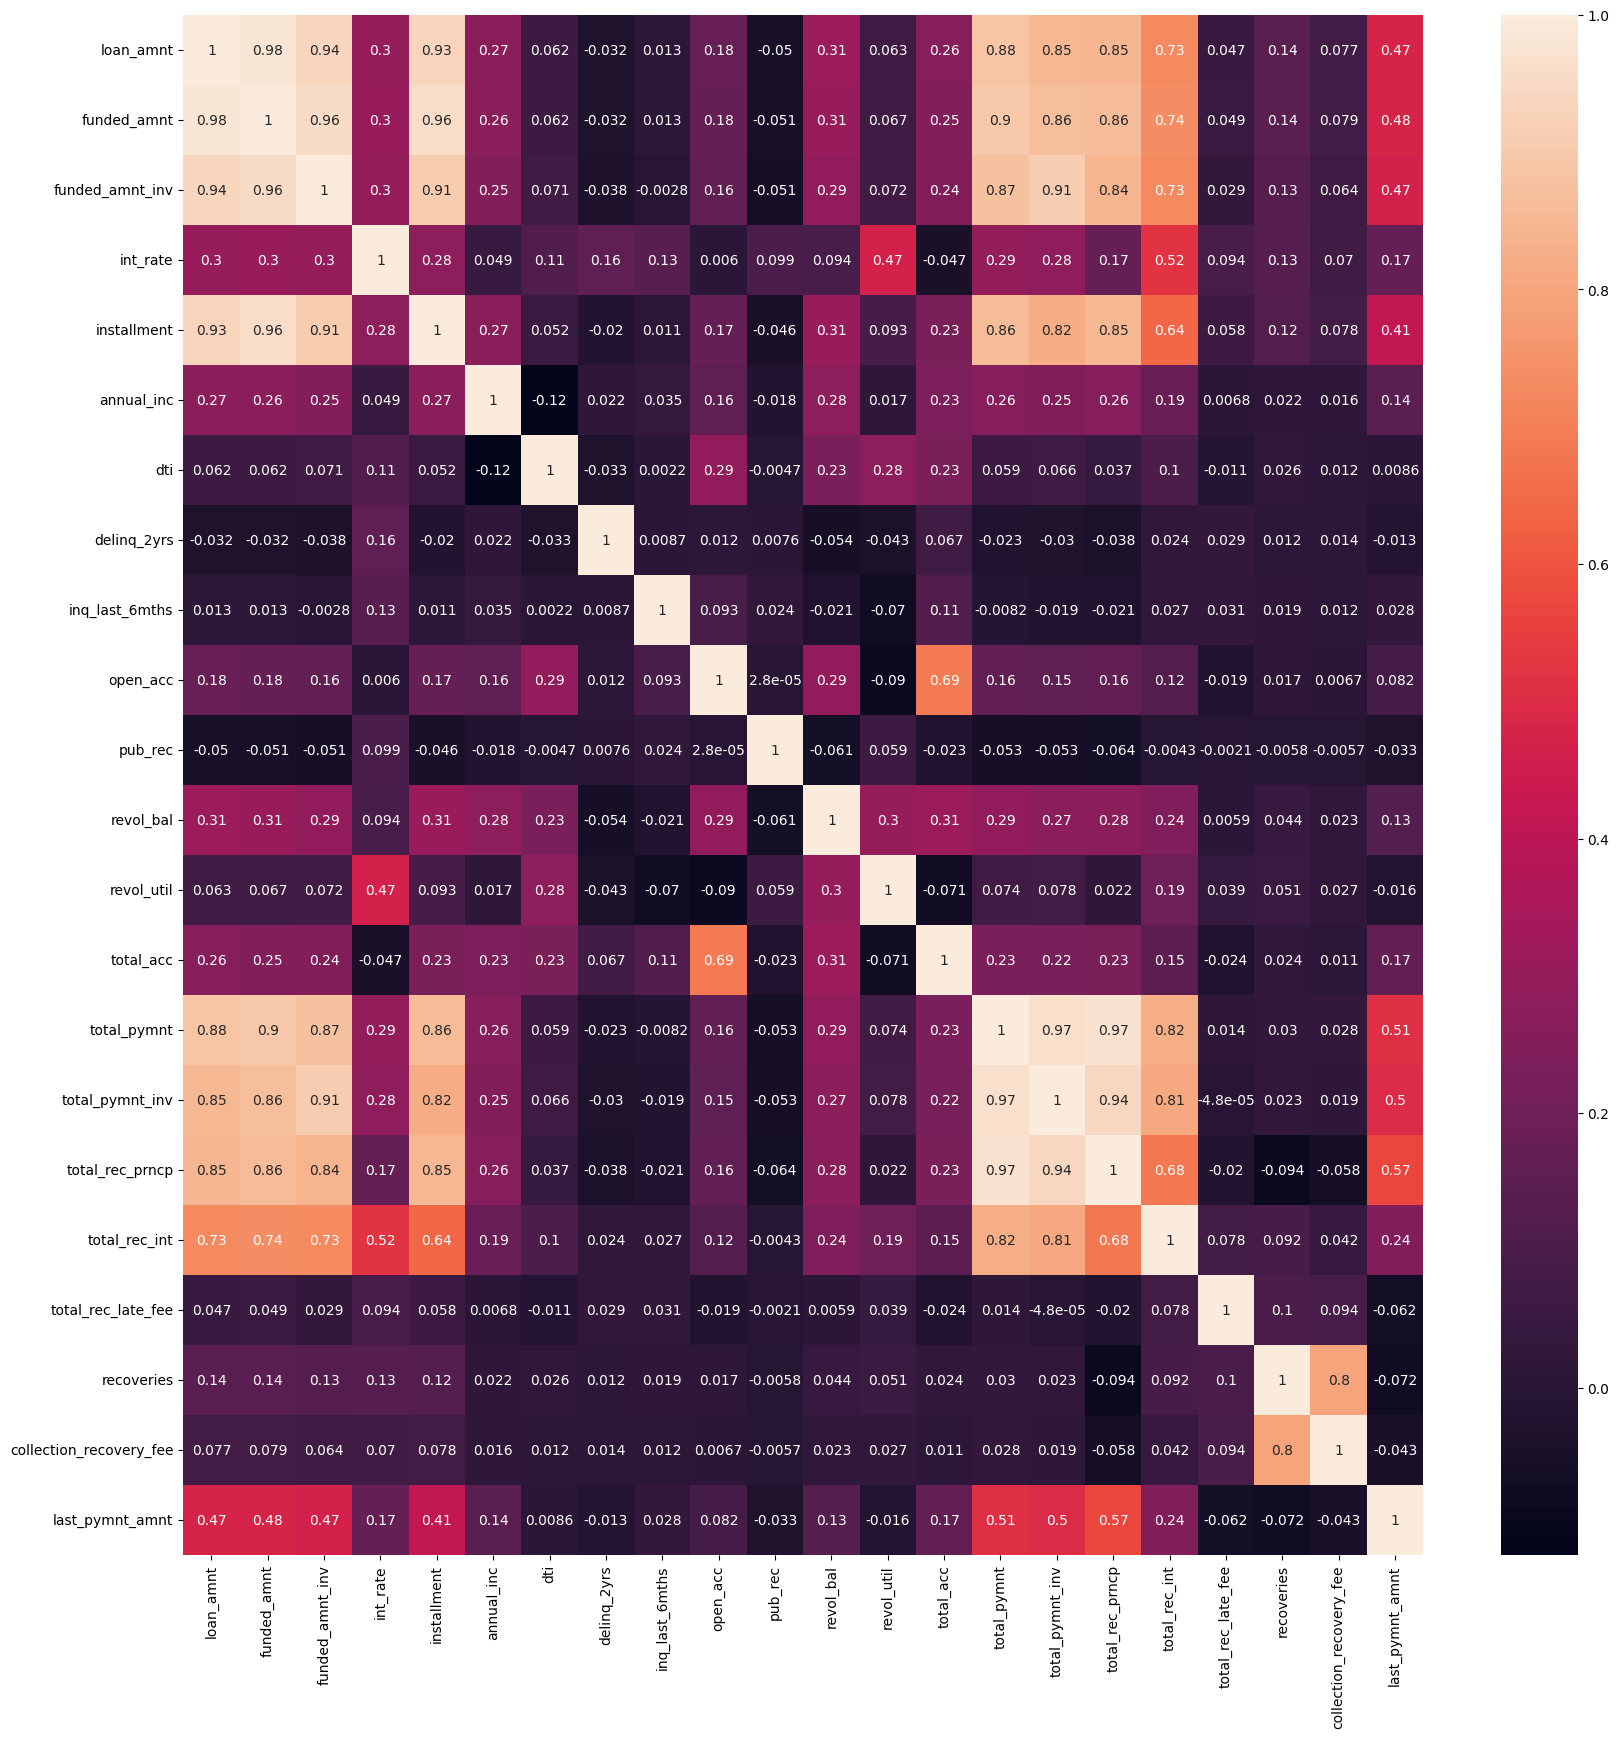

In [44]:
#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(loan_data[loan_num_cols].corr(), annot=True)
plt.show()

#### <b>Observation:</b>
- loan_amnt is correlated to funded_amnt, funded_amnt_inv with r factor 0.98, 0.94 as expected
- loan_amnt is correlated to last_payment_amount with r factor 45
- int_rate is correlated to revol_util with an r factor of .47 - This is good, as the company charges higher interest from riskier loans.
- loan_amnt revol_bal correlate with r factor .35 - This is not good as it suggests that higher loan amounts are being approved to riskier borrowers.

*************************

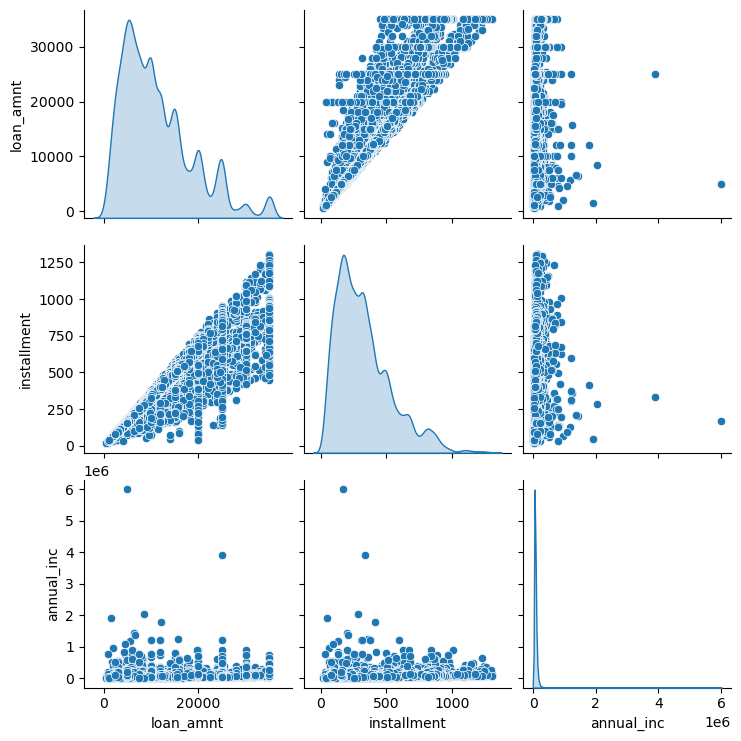

In [5]:
#Pairwise Relationships - Objective: Visualize pairwise relationships across multiple variables.
#Business Implication: Pair plots provide insights into how different variables relate to each other and their distribution across loan status categories.
loan_num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc']

# Display pair plot
sns.pairplot(loan_data[loan_num_cols], diag_kind='kde')
plt.show()

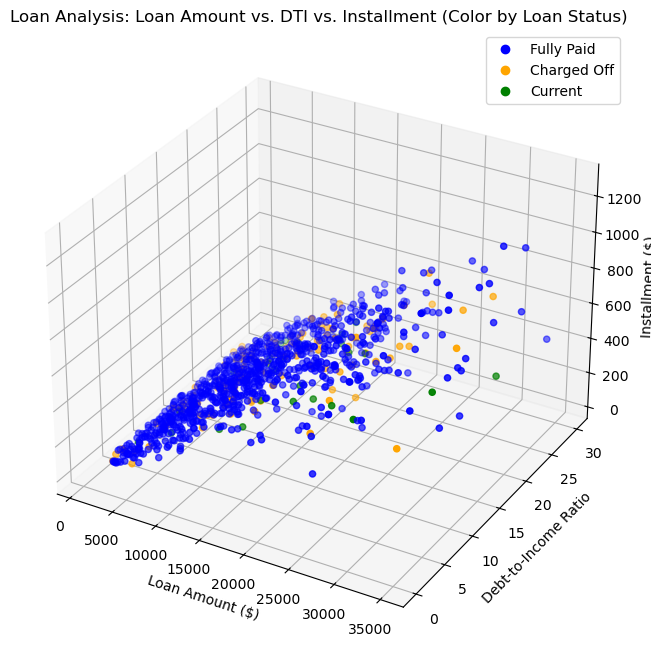

In [6]:
#Multidimensional Scatter Plot - Objective: Explore interactions among three or more variables in a 3D or higher-dimensional space.
# Subset data for visualization
subset_data = loan_data.sample(n=1000, random_state=42)  # Sample data for clearer visualization

# Define color mapping for loan statuses
status_colors = {
    'Fully Paid': 'blue',       # Color for Fully Paid loans
    'Charged Off': 'orange',    # Color for Charged Off loans
    'Current': 'green'          # Color for Current loans
}

# Create a 3D scatter plot
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

# Scatter plot with color-coded loan statuses
for status, color in status_colors.items():
    subset_status = subset_data[subset_data['loan_status'] == status]
    ax.scatter3D(subset_status['loan_amnt'], subset_status['dti'], subset_status['installment'], c=color, label=status)

# Set labels and title
ax.set_xlabel('Loan Amount ($)')
ax.set_ylabel('Debt-to-Income Ratio')
ax.set_zlabel('Installment ($)')
ax.set_title('Loan Analysis: Loan Amount vs. DTI vs. Installment (Color by Loan Status)')

# Add legend with custom color labels
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=status, linestyle='None') for status, color in status_colors.items()]
ax.legend(handles=legend_elements)

# Show the plot
plt.show()


### <b>Dervied Metrics</b>

In [45]:
# Create a new column for the ratio of annual income to the loan amount
loan_data_no_outliers['income_loan_ratio'] = loan_data_no_outliers['loan_amnt'] * 100/ loan_data_no_outliers['annual_inc']

# Verify the new column
print(loan_data_no_outliers[['annual_inc', 'loan_amnt', 'income_loan_ratio']].head())


   annual_inc  loan_amnt  income_loan_ratio
0       24000       5000              20.83
1       30000       2500               8.33
2       12252       2400              19.59
3       49200      10000              20.33
5       36000       5000              13.89


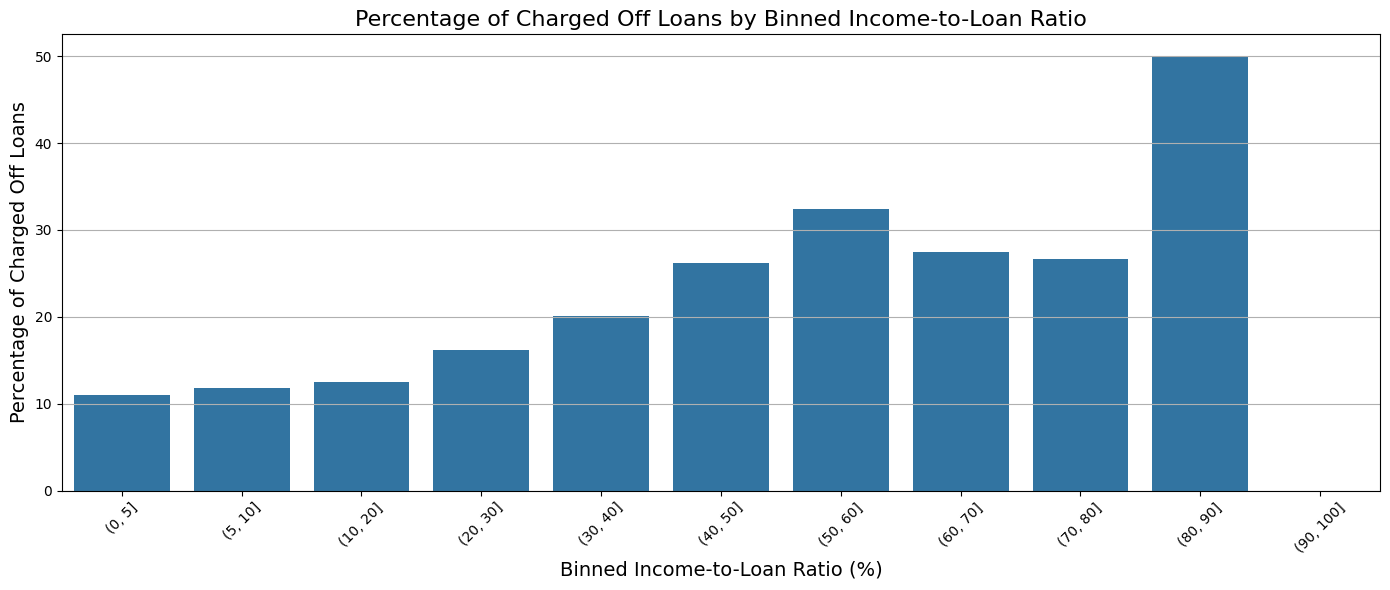

In [46]:
# Define custom bins for the ratio column (assuming ratio is in percentage)
bins = pd.cut(loan_data_no_outliers['income_loan_ratio'], bins=[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Calculate the percentage of charged-off loans and count of total loans within each bin
charged_off_counts = loan_data_no_outliers[loan_data_no_outliers['loan_status'] == 'Charged Off'].groupby(bins).size()
total_counts = loan_data_no_outliers.groupby(bins).size()
charged_off_percentage = (charged_off_counts / total_counts) * 100

# Plotting
plt.figure(figsize=(14, 6))

# Plot percentage of charged-off loans
ax = sns.barplot(x=charged_off_percentage.index, y=charged_off_percentage.values)

plt.title('Percentage of Charged Off Loans by Binned Income-to-Loan Ratio', fontsize=16)
plt.xlabel('Binned Income-to-Loan Ratio (%)', fontsize=14)
plt.ylabel('Percentage of Charged Off Loans', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("charged_off_percentage_with_count_on_top.png", transparent=True)
plt.show()

#### <b>Observation:</b>
- As long as loan amount is less than 20% of annual income, defaults are low.
- Loan amounts of 30% of annual income or higher see a high rate of default.

*************************

## Overall Observations

After conducting exploratory data analysis (EDA) on the Lending Club dataset, several key observations have been made regarding the factors influencing loan default:

1. **Employment Length**: There is an inverse correlation between employment length and the likelihood of loan default. Borrowers with longer employment tenures tend to have lower default rates compared to those with shorter tenures.

2. **Debt-to-Income Ratio (DTI)**: Higher DTI ratios are positively correlated with loan default, indicating that borrowers with higher debt burdens are more likely to default on their loans.

3. **Loan Grade and Subgrade**: Lending Club's loan grading system is a strong predictor of default, with higher-grade loans exhibiting lower default rates. This highlights the importance of creditworthiness assessment in loan approval processes.

4. **Homeownership Status**: Homeowners are associated with lower default rates compared to renters. This suggests that homeownership status may serve as a protective factor against loan default, possibly due to greater financial stability or asset ownership.

5. **Loan Purpose**: The purpose of the loan also influences default rates, with loans for debt consolidation having relatively lower default rates compared to other purposes such as small business or education. This underscores the importance of considering the intended use of the loan when assessing default risk.

6. **Loan Term**: The length of the loan term is inversely related to default rates, with longer-term loans having higher default rates compared to shorter-term loans. This suggests that longer repayment periods may increase the risk of default.

7. **Interest Rates**: Charged-off loans tend to have higher interest rates compared to fully paid loans. This indicates a potential association between higher interest rates and increased risk of default, highlighting the importance of interest rate pricing in risk management.

These observations provide valuable insights for Lending Club in refining its lending strategies, risk assessment processes, and portfolio management techniques to minimize credit losses and enhance overall loan performance.
